[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/peteyeh/celltrack/HEAD?labpath=param_sweep.ipynb)

In [1]:
%matplotlib inline

import cv2
import yaml

from src.improcessing import *
from src.maskcreation import *

# Read image and load base params

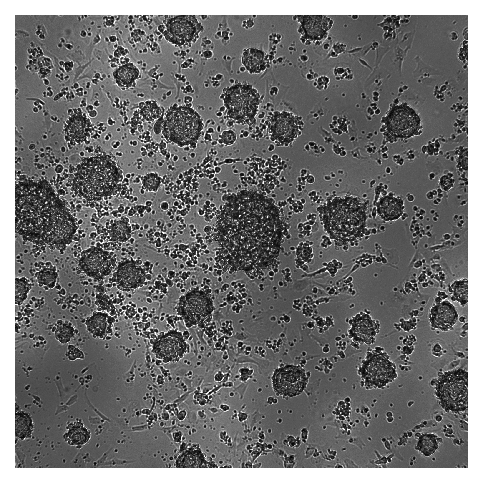

In [2]:
image_stack = cv2.imreadmulti('source_images/D1_plate1.tiff', flags=cv2.IMREAD_GRAYSCALE)[1]
image = scale_image(image_stack[39], mode=90)

with open('src/params_gray_mask.yml', 'r') as f:
    param_file = yaml.load(f, Loader=yaml.FullLoader)
    mode = param_file['mode']
    params = param_file['params']

display_image(image, dpi=150)

# Sweep through search range

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-15 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-14 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
-14: 2154, 445


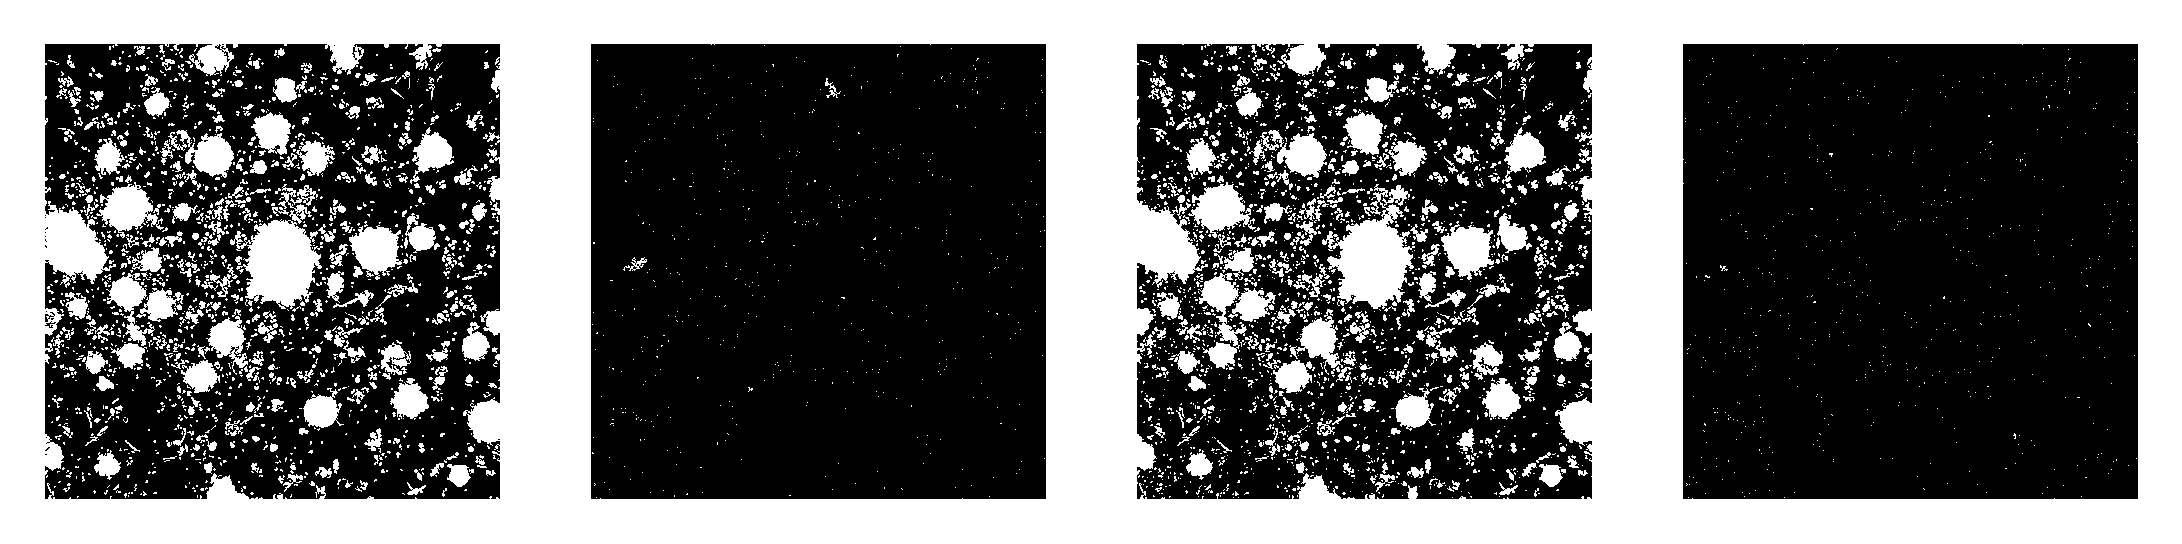

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-13 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
-13: 1016, 1238


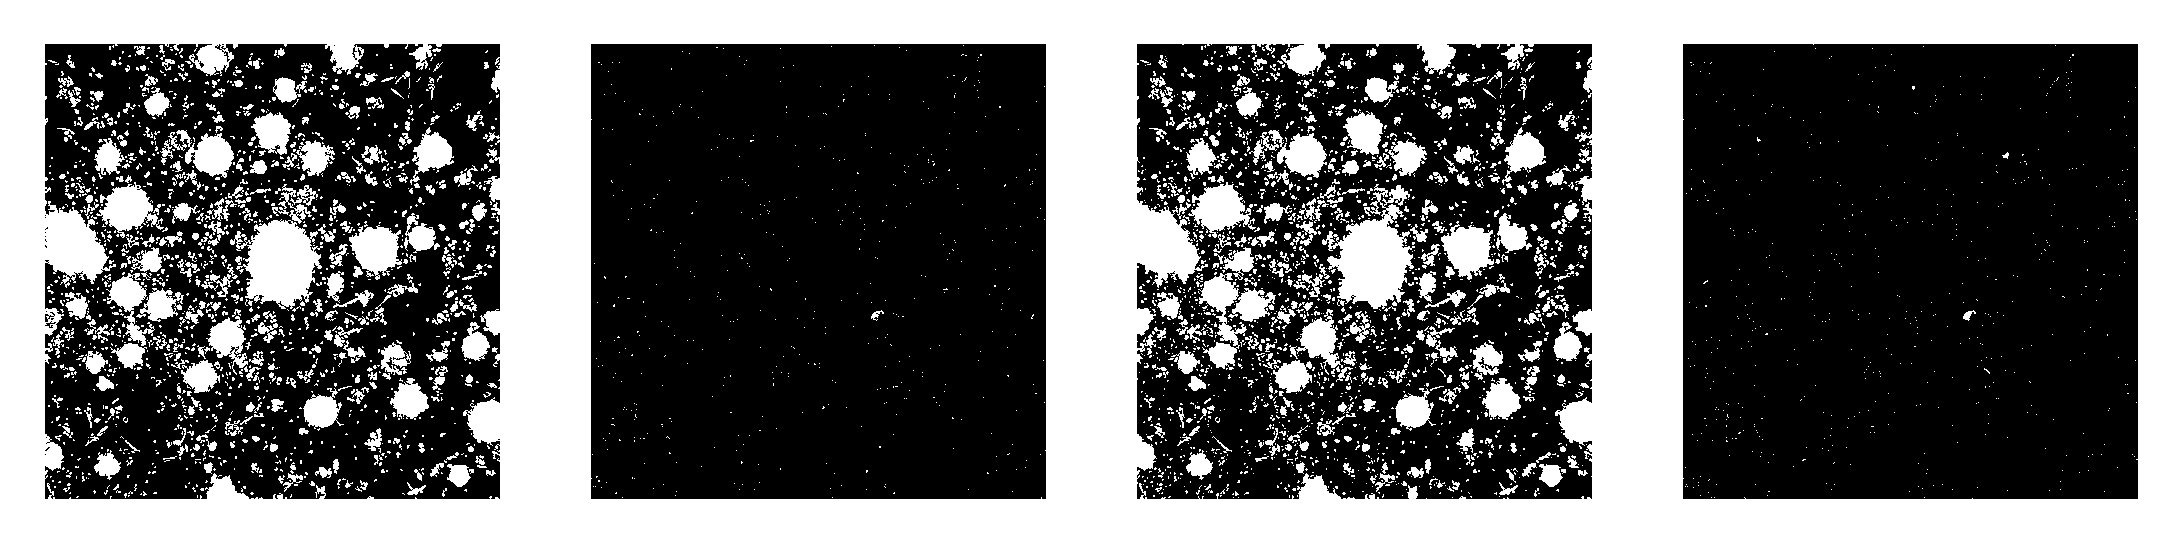

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-12 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
-12: 320, 1359


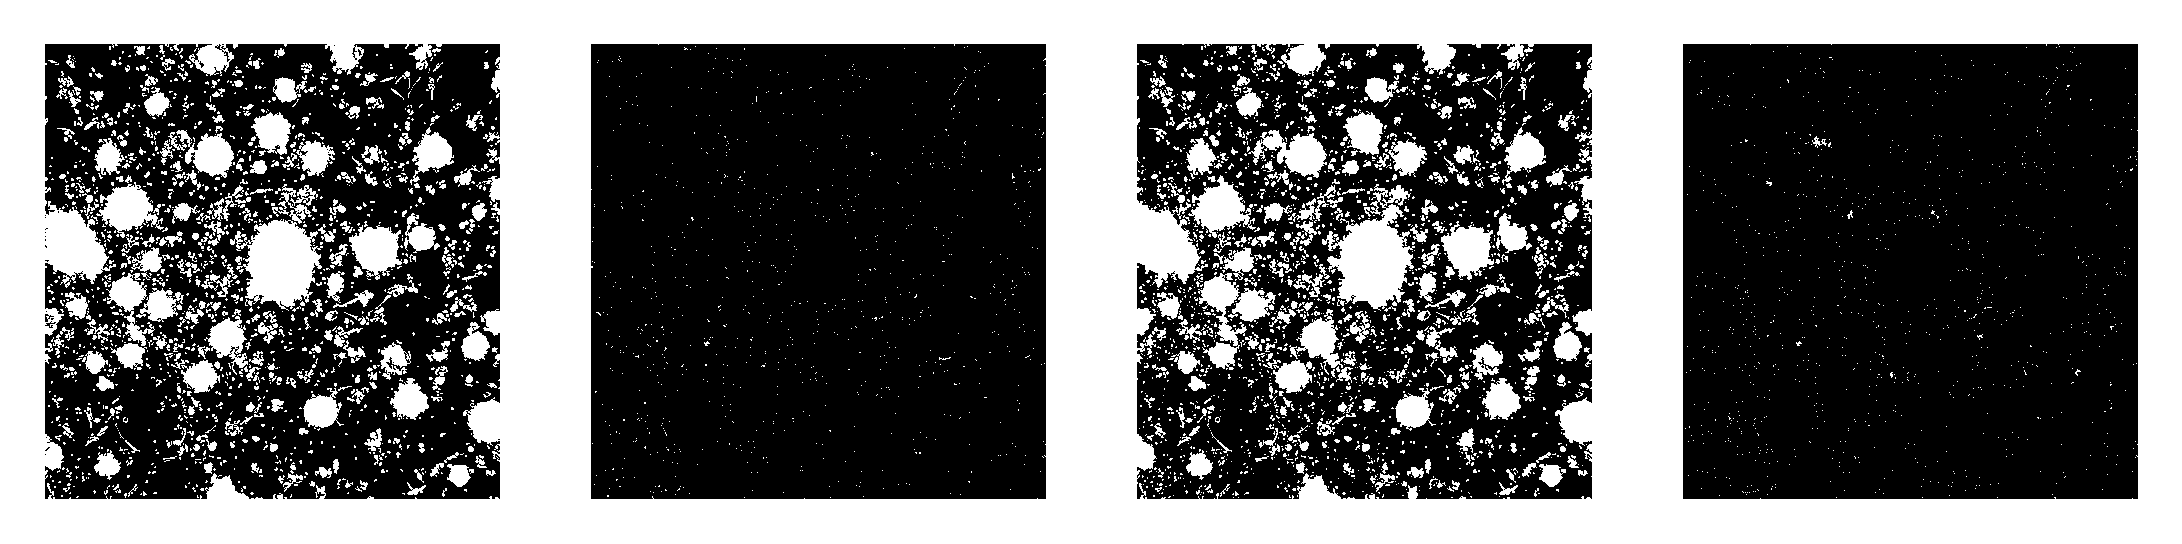

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-11 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
-11: 1006, 1089


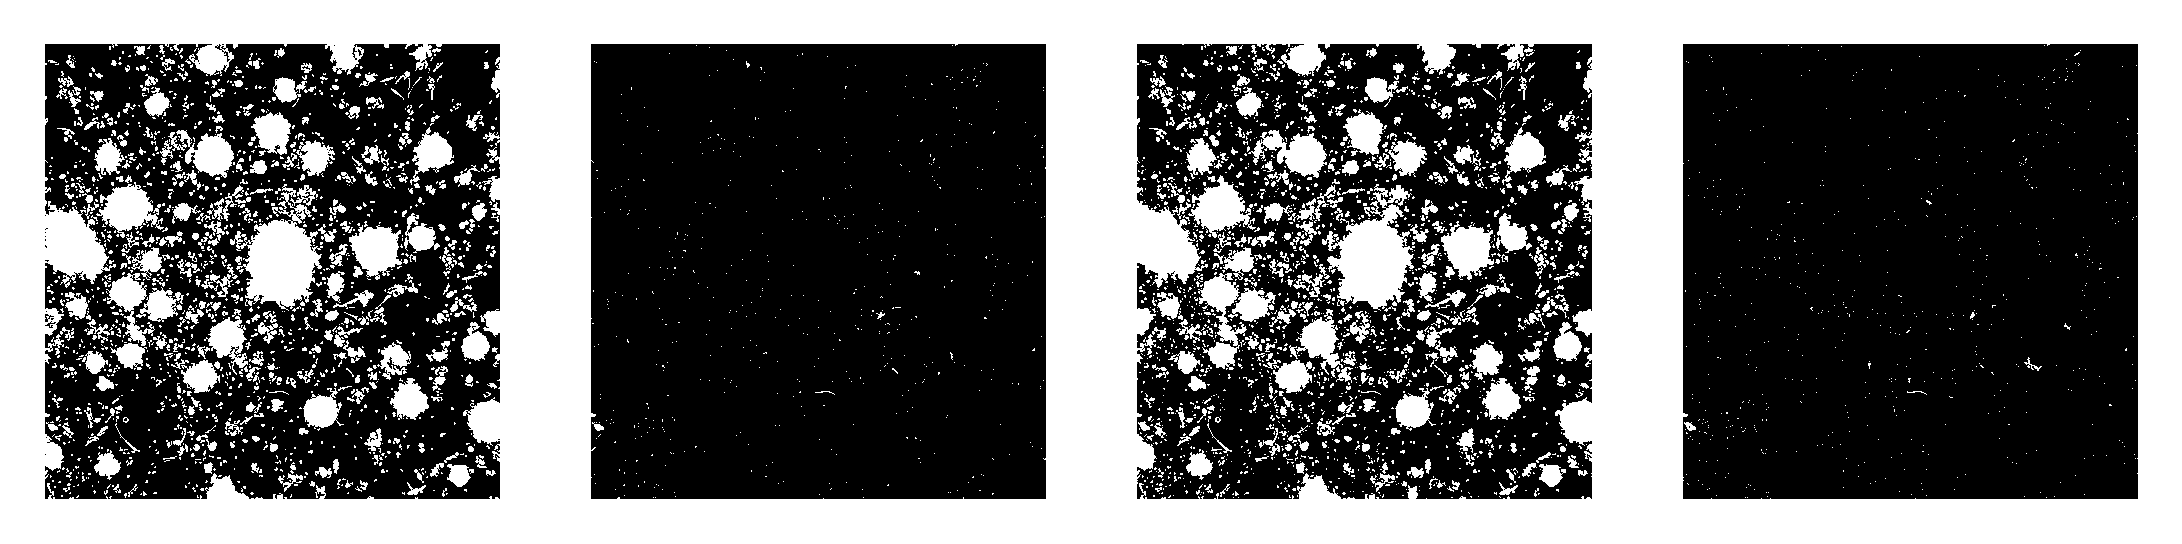

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-10 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
-10: 2300, 2391


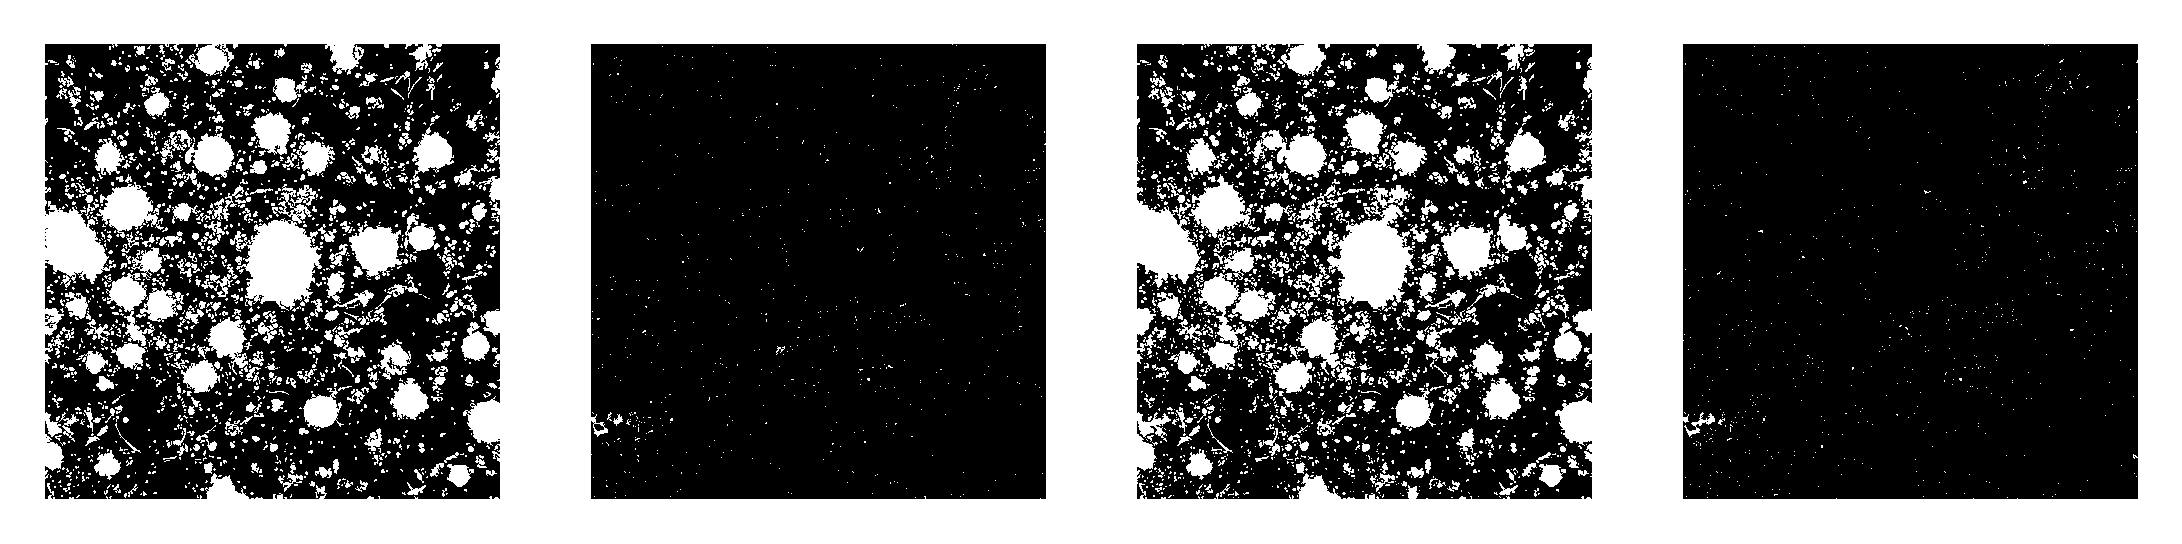

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-9 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
-9: 4298, 6255


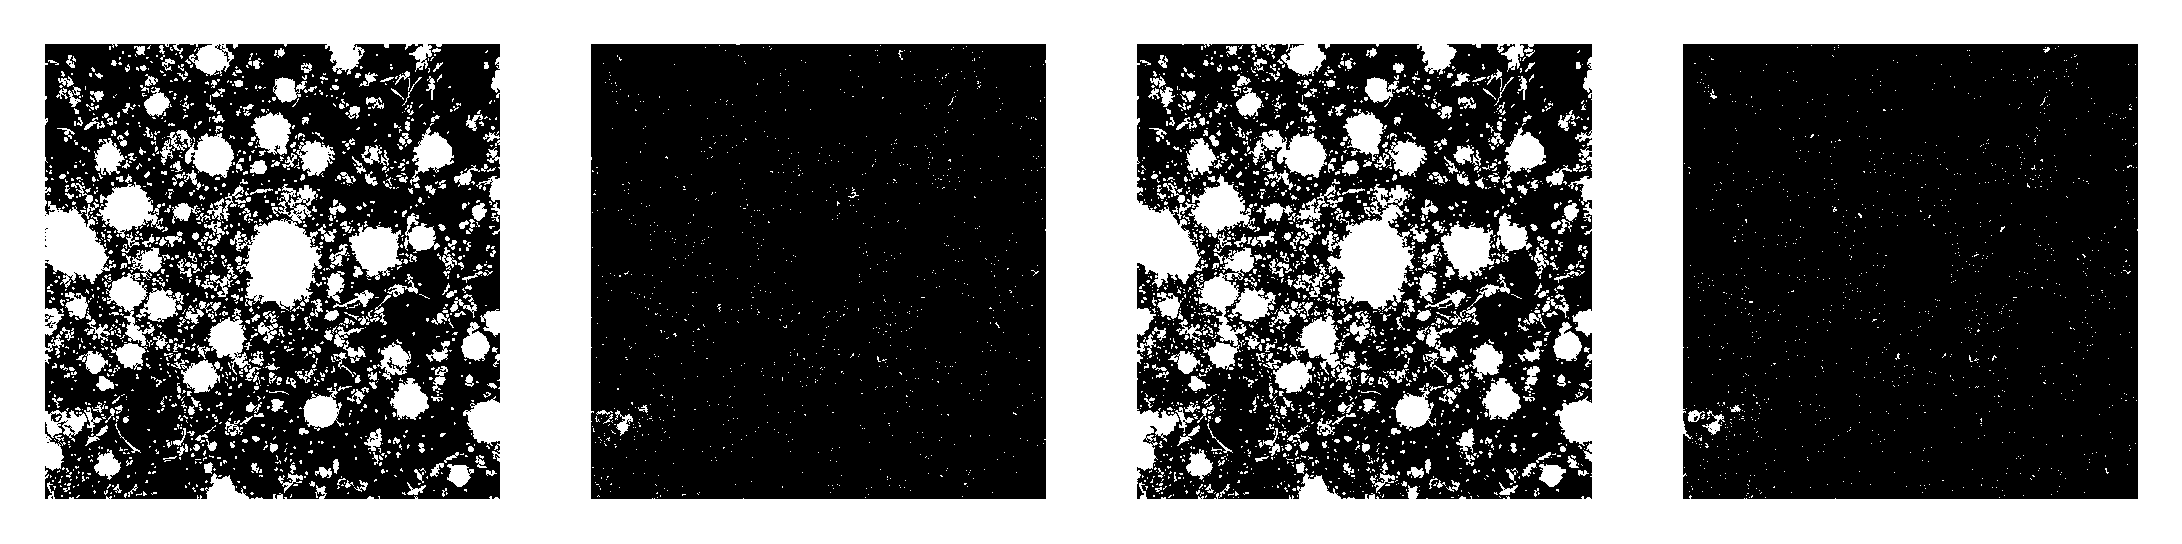

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-8 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
-8: 2658, 3140


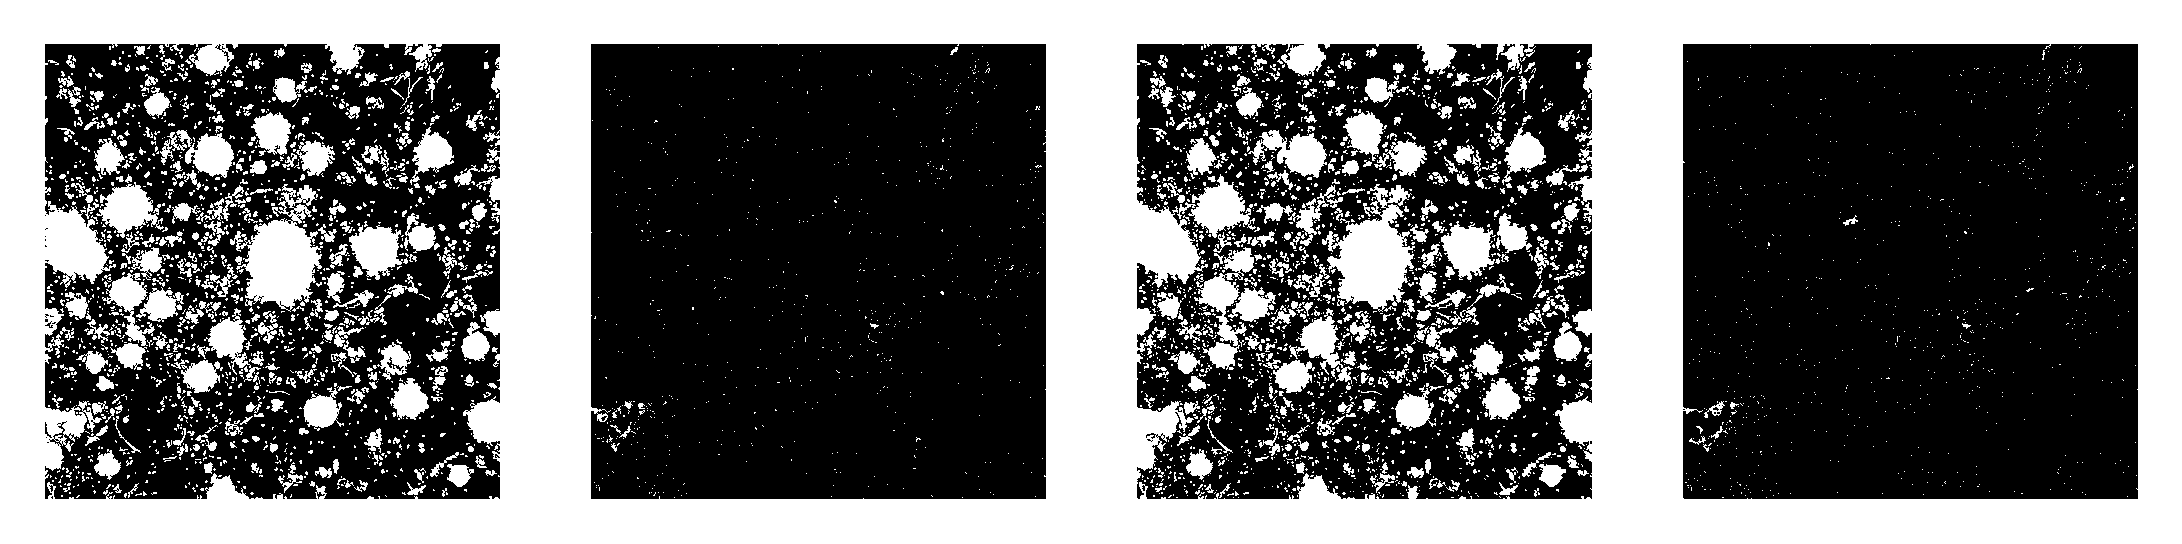

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-7 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
-7: 1830, 4316


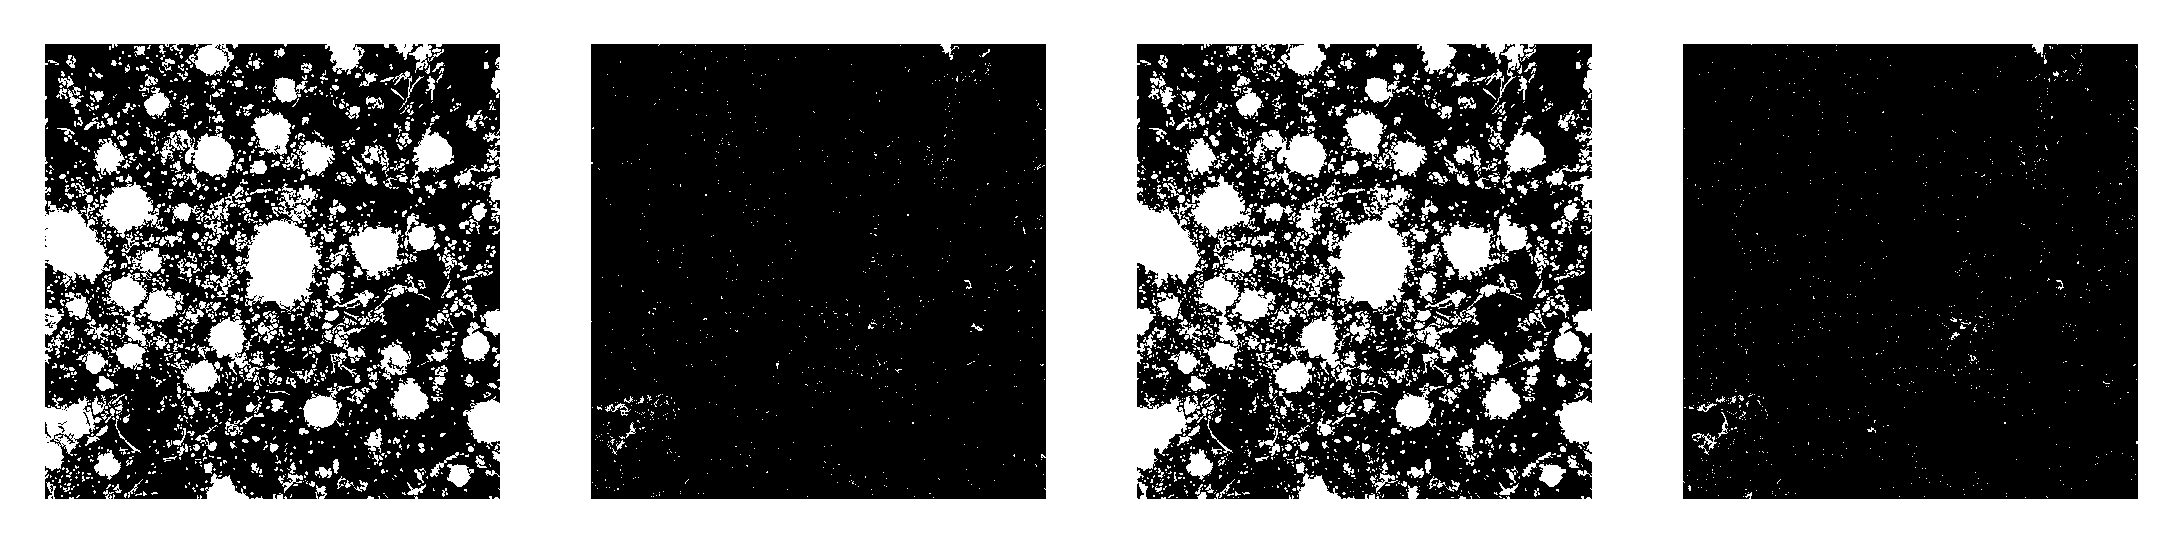

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-6 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:
-6: 6780, 6504


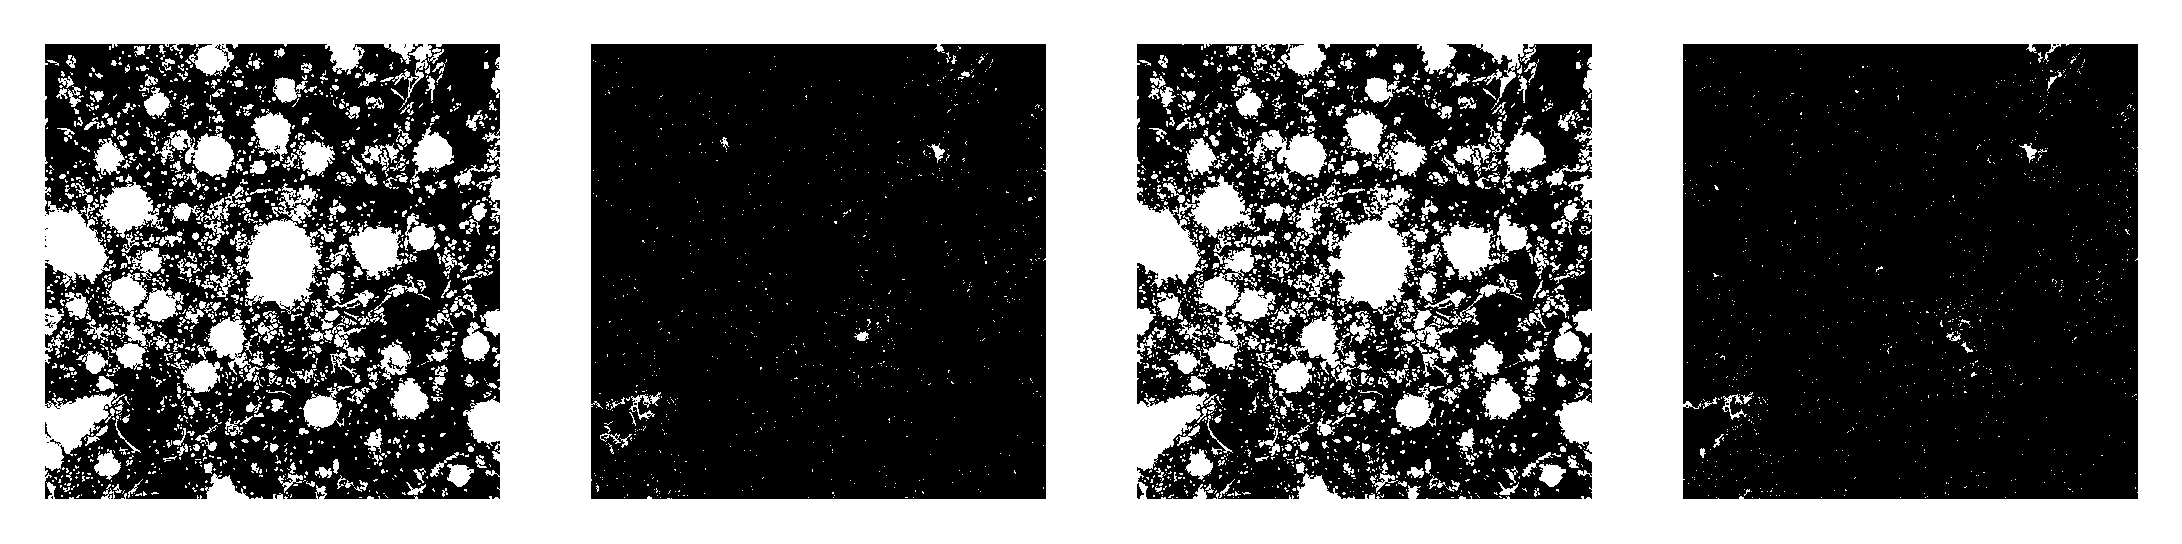

In [3]:
search_range = range(-15, -5)

prev_true = None
prev_test = None
for offset in search_range:
    params['offset'] = offset 
    true_mask = get_mask_image(image, {'mode': mode, 'params': params}, verbosity=0)
    test_params = params.copy()
    test_params['closure_ks'] = 4
    del test_params['size_thresh']
    test_mask = get_mask_image(image, {'mode': mode, 'params': test_params}, verbosity=1)

    if prev_true is not None and prev_test is not None:
        true_diff = true_mask - prev_true
        test_diff = test_mask - prev_test
        print("%i: %i, %i" % (offset,
                              np.max(cv2.connectedComponentsWithStats(true_diff, connectivity=8)[2][1:,-1]),
                              np.max(cv2.connectedComponentsWithStats(test_diff, connectivity=8)[2][1:,-1])))
        display_image_array([true_mask, true_diff, test_mask, test_diff], columns=4, dpi=450)

    prev_true = true_mask
    prev_test = test_mask

# Select final param

Searching through range range(-20, 1).
Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-20 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


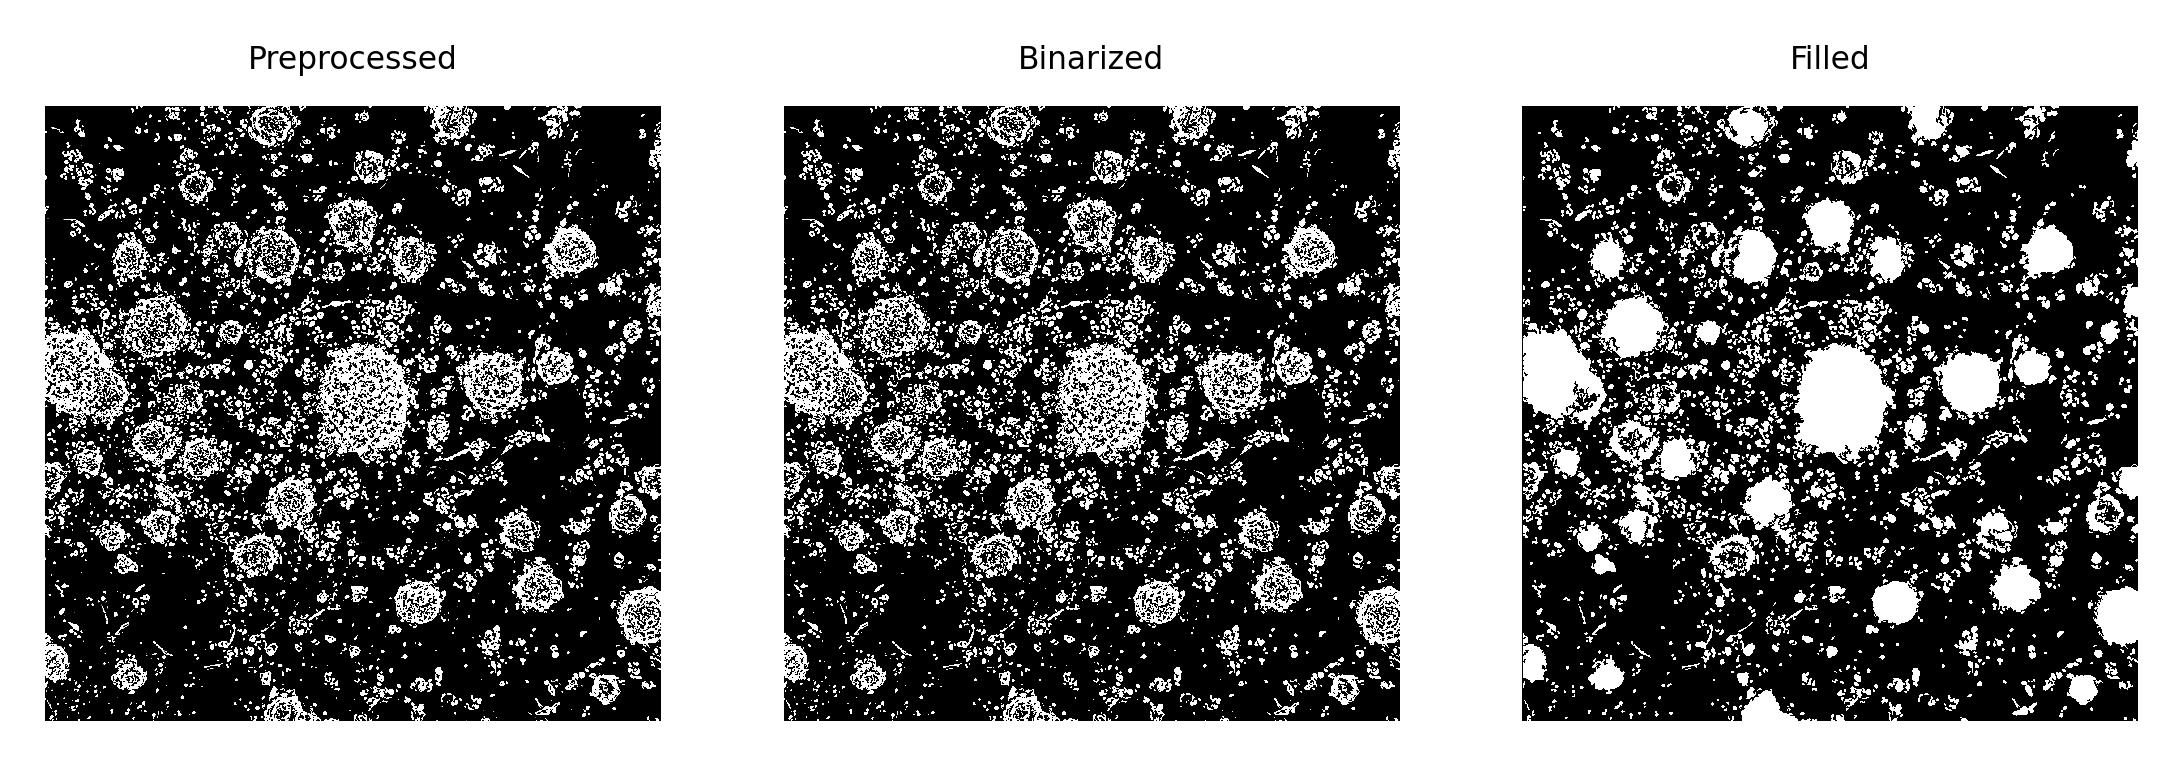

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-20 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


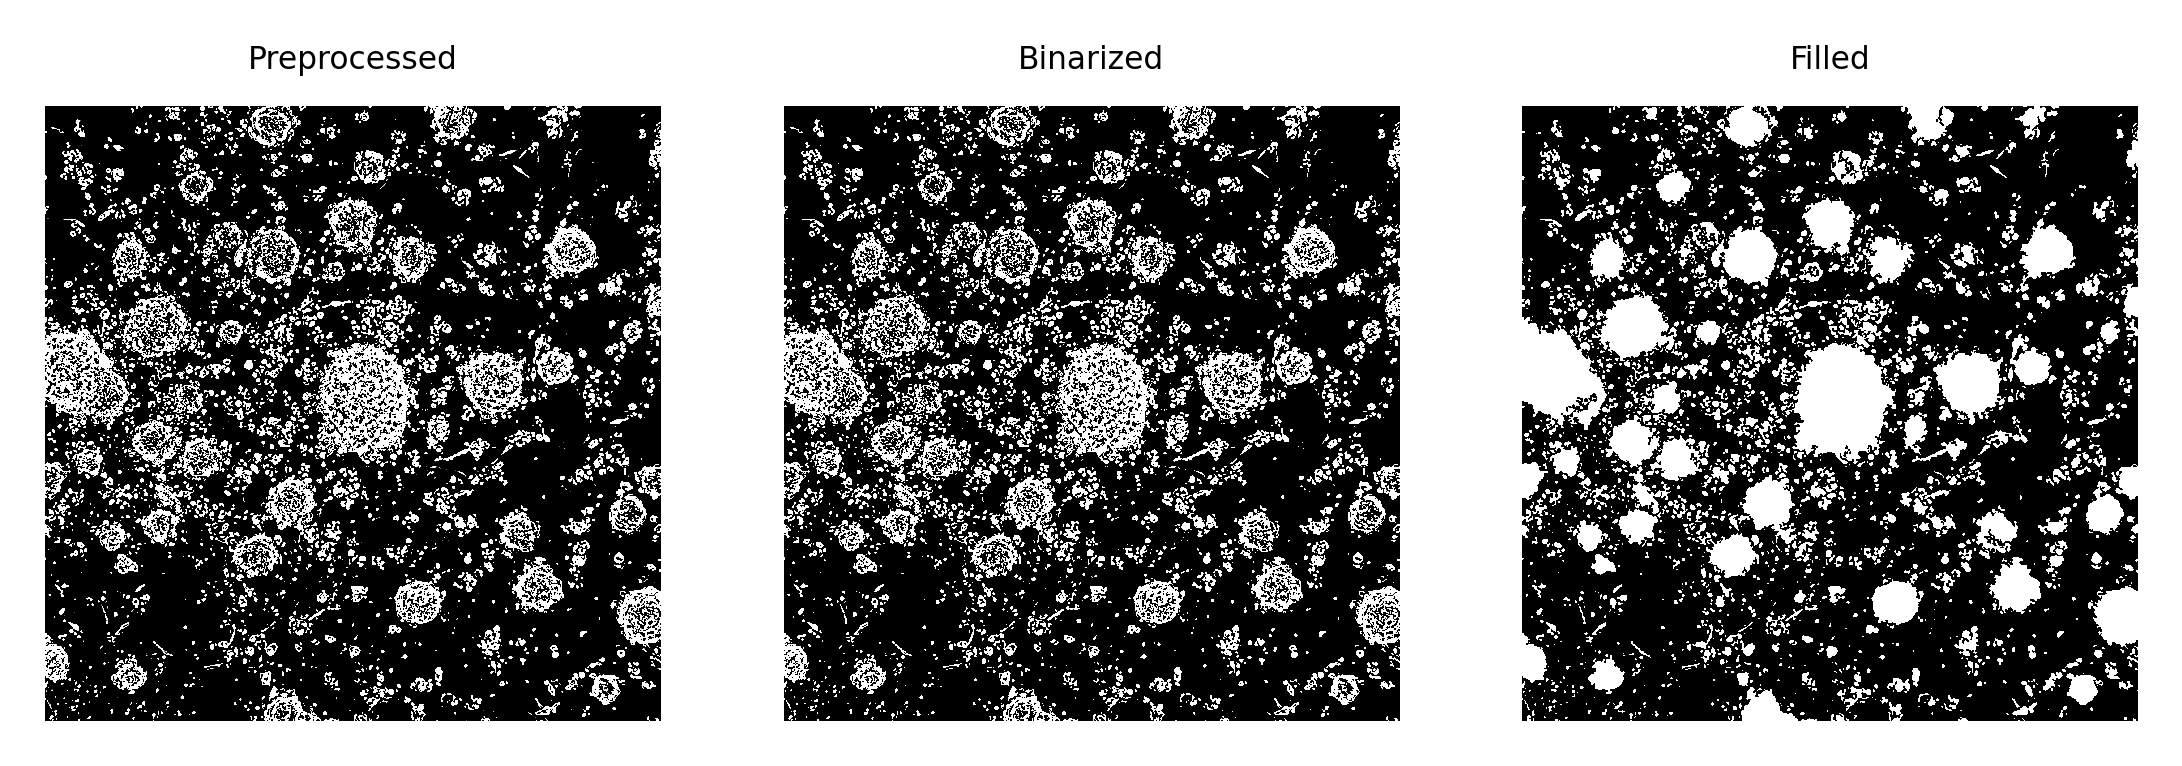

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-19 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


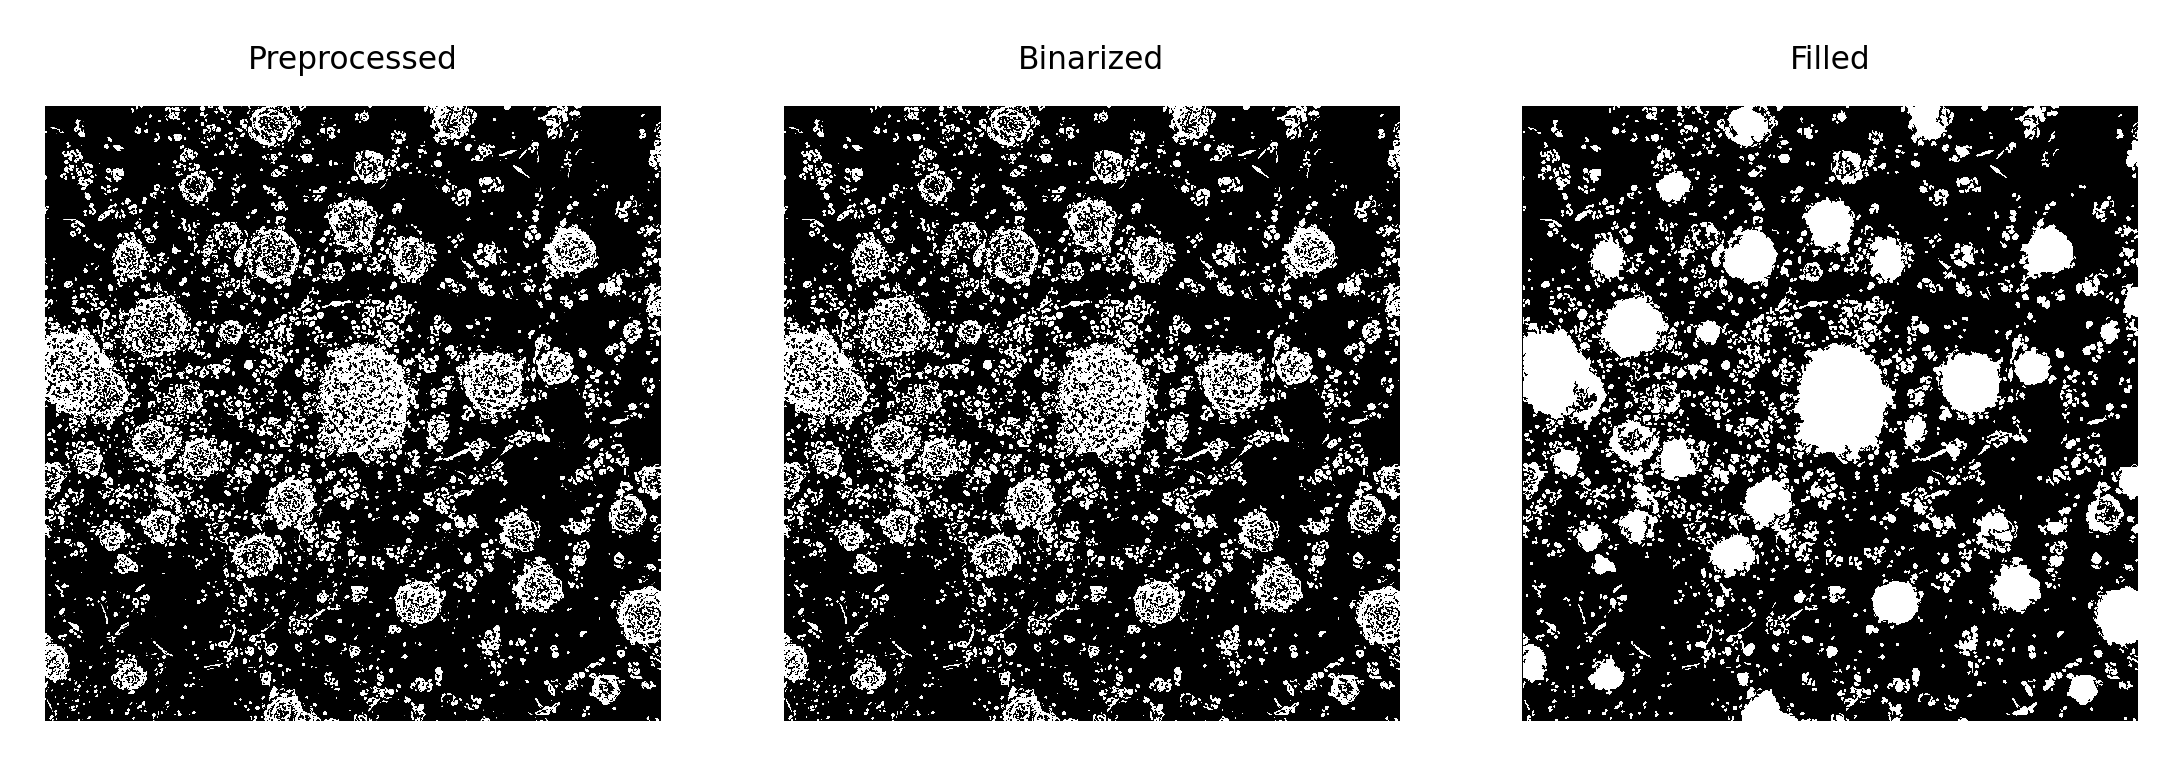

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-19 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


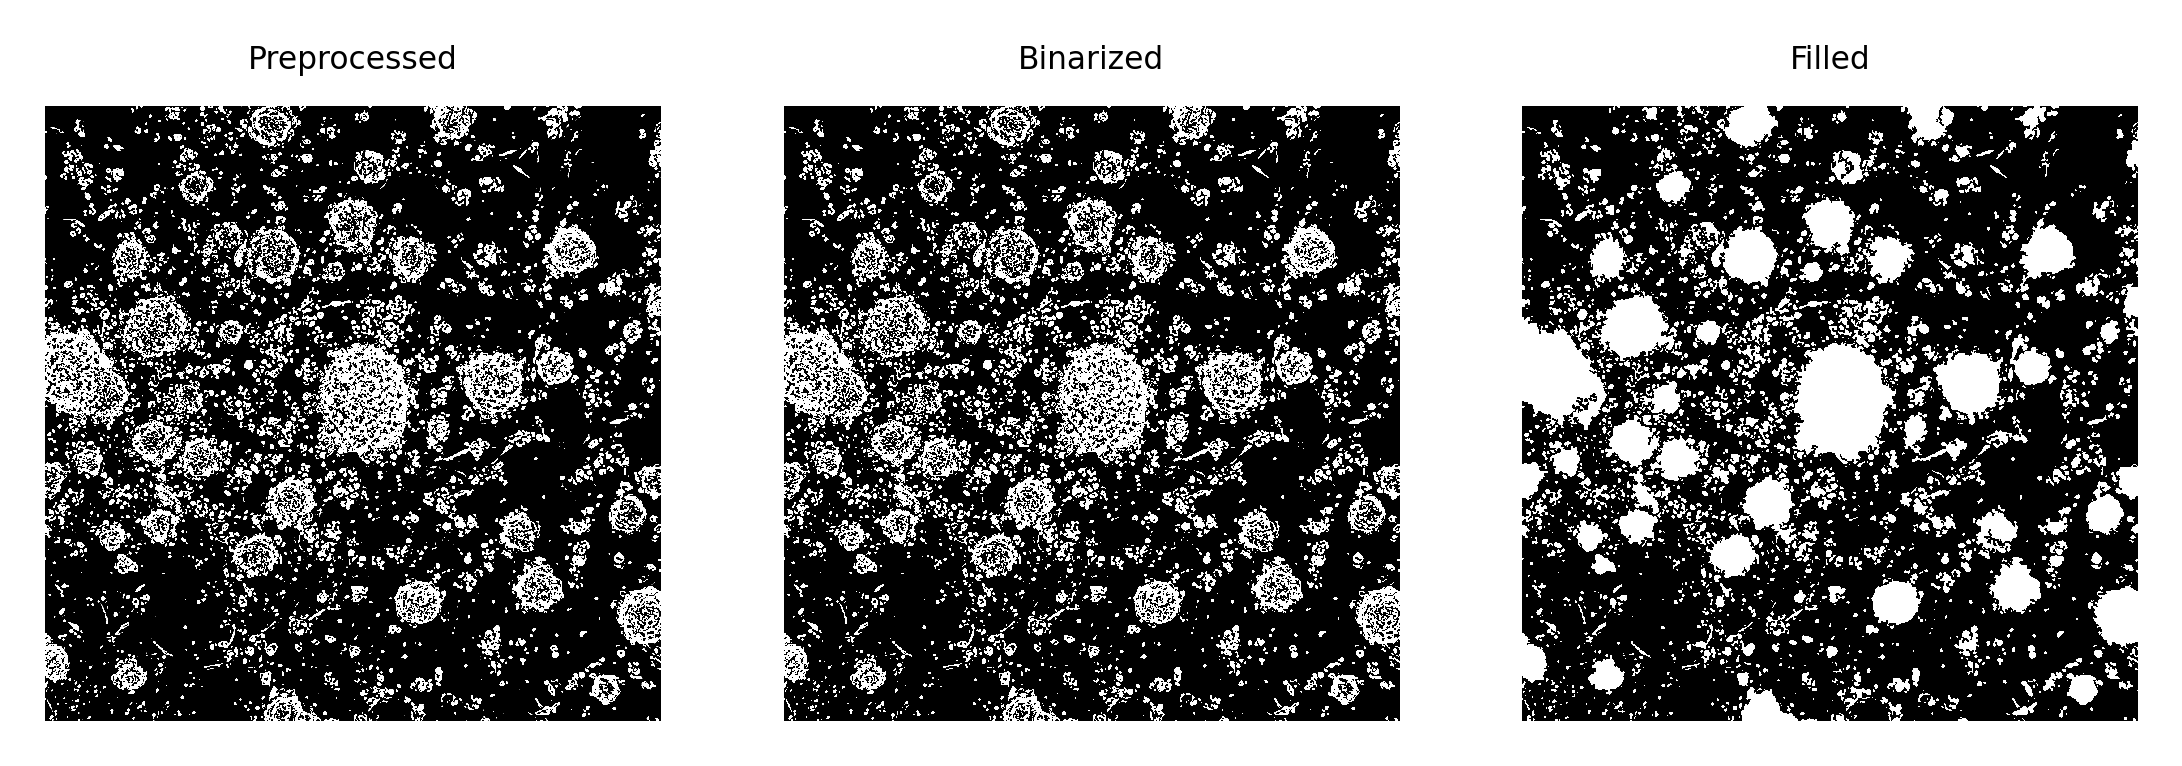

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-18 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


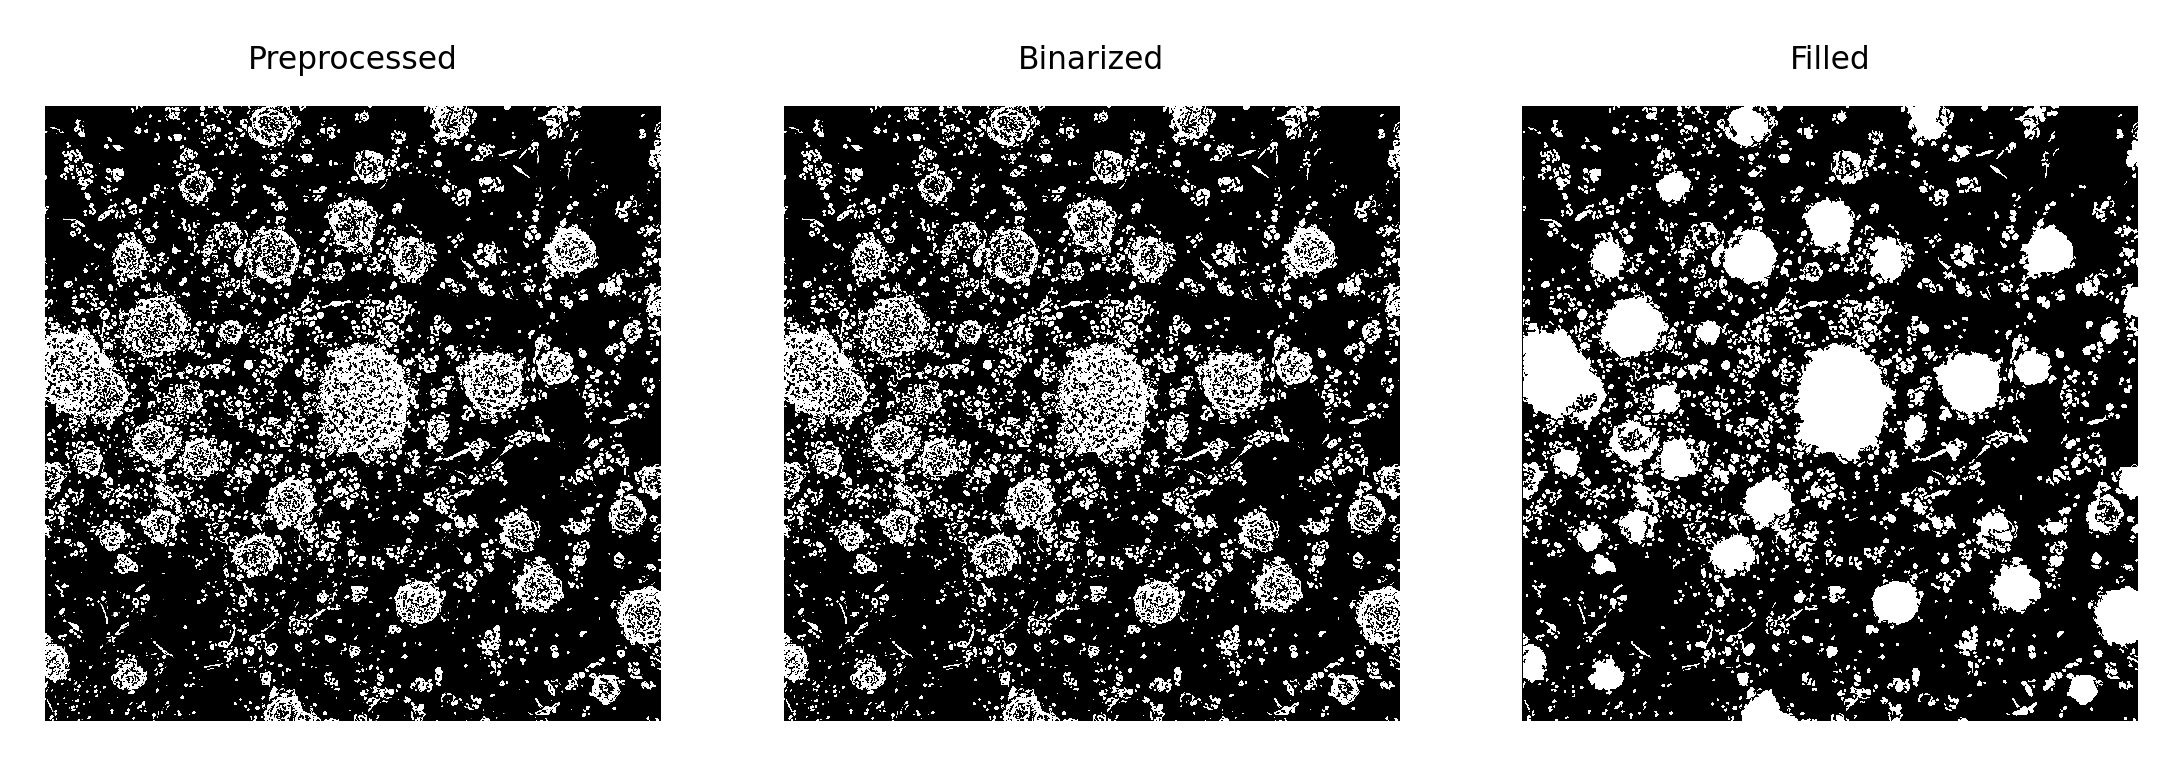

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-18 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


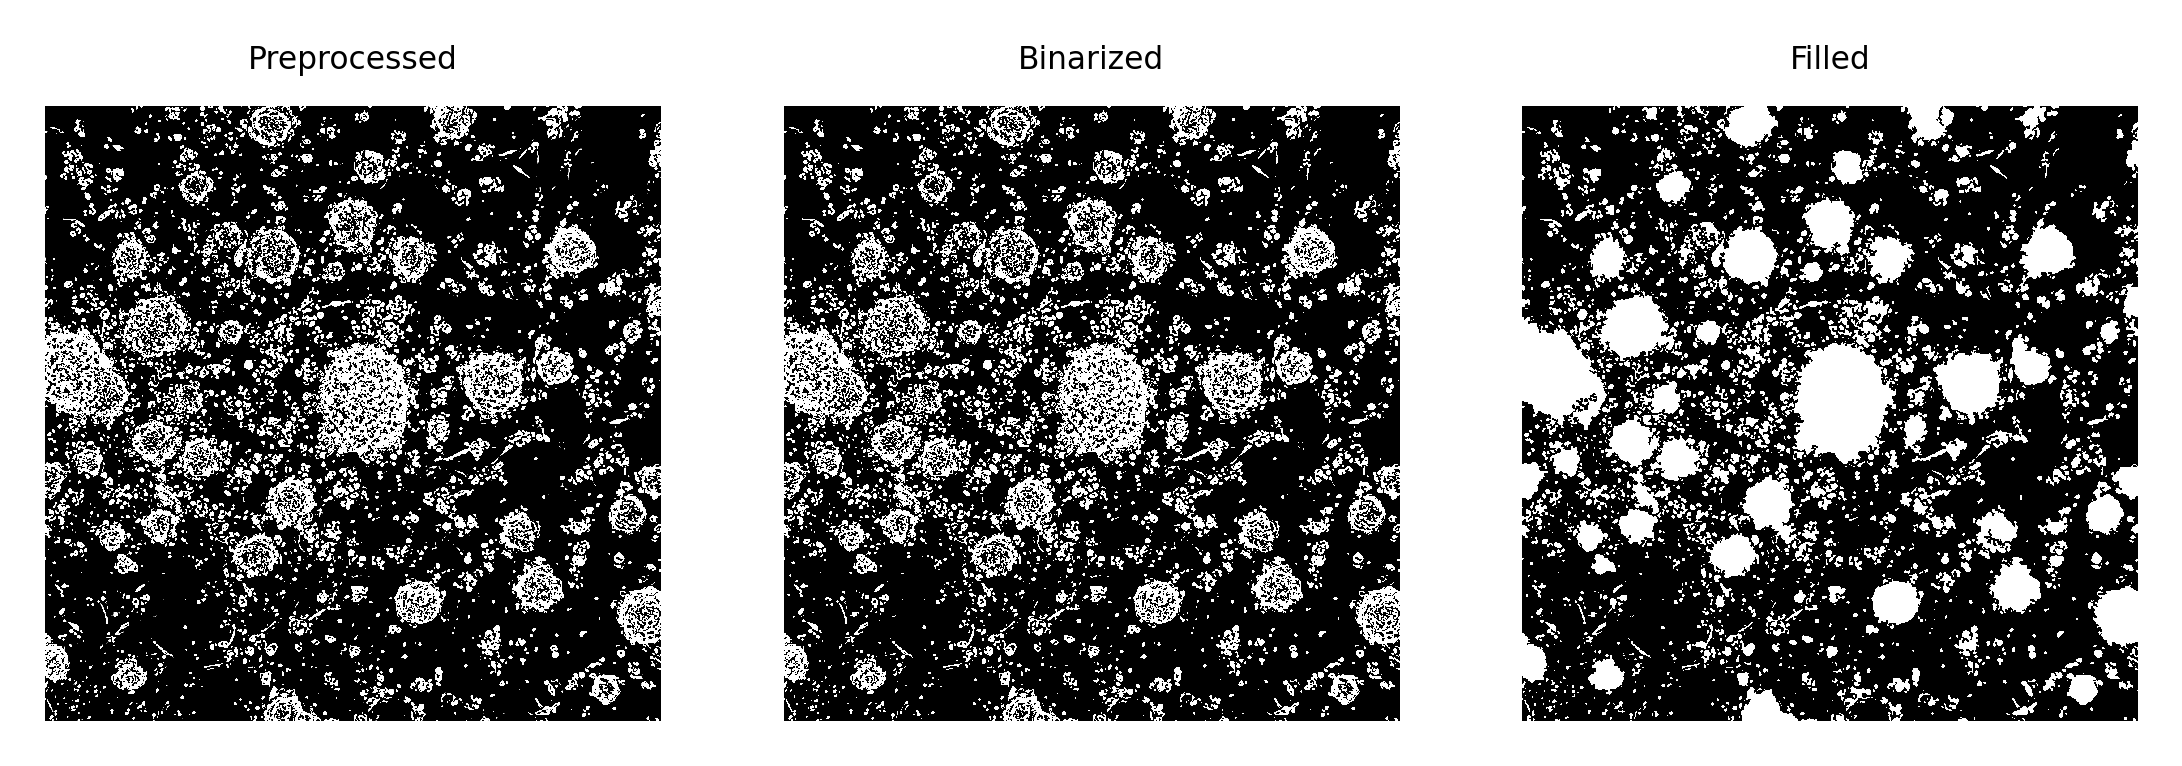

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-17 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


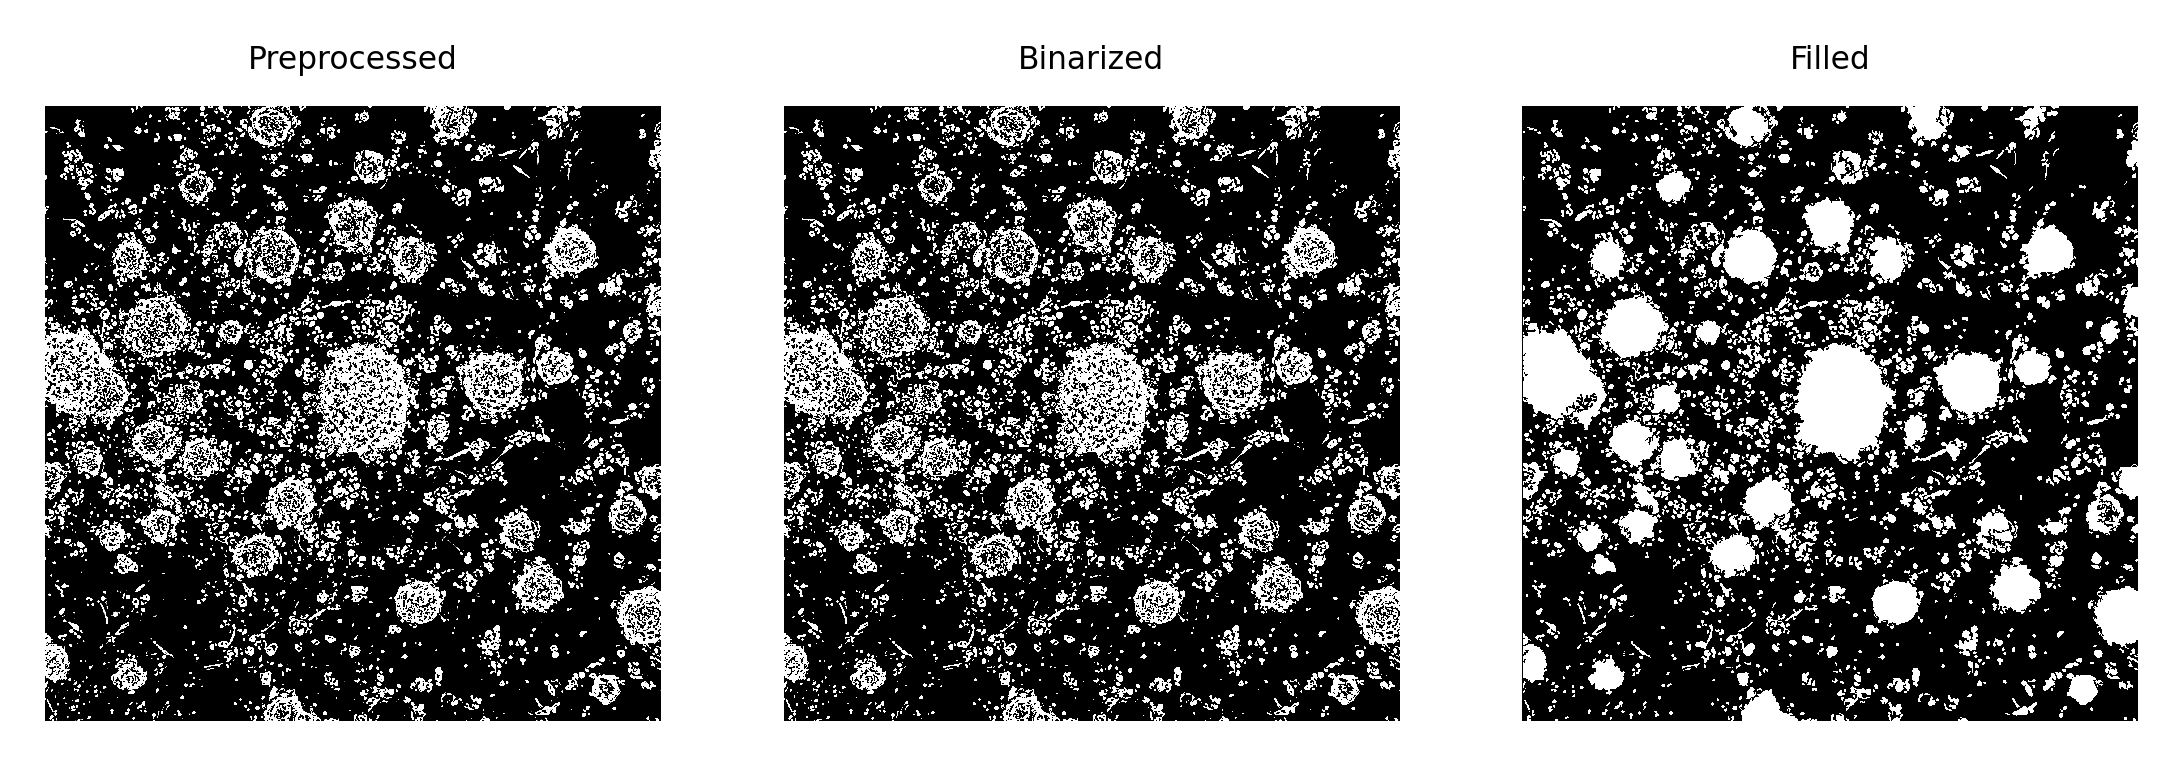

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-17 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


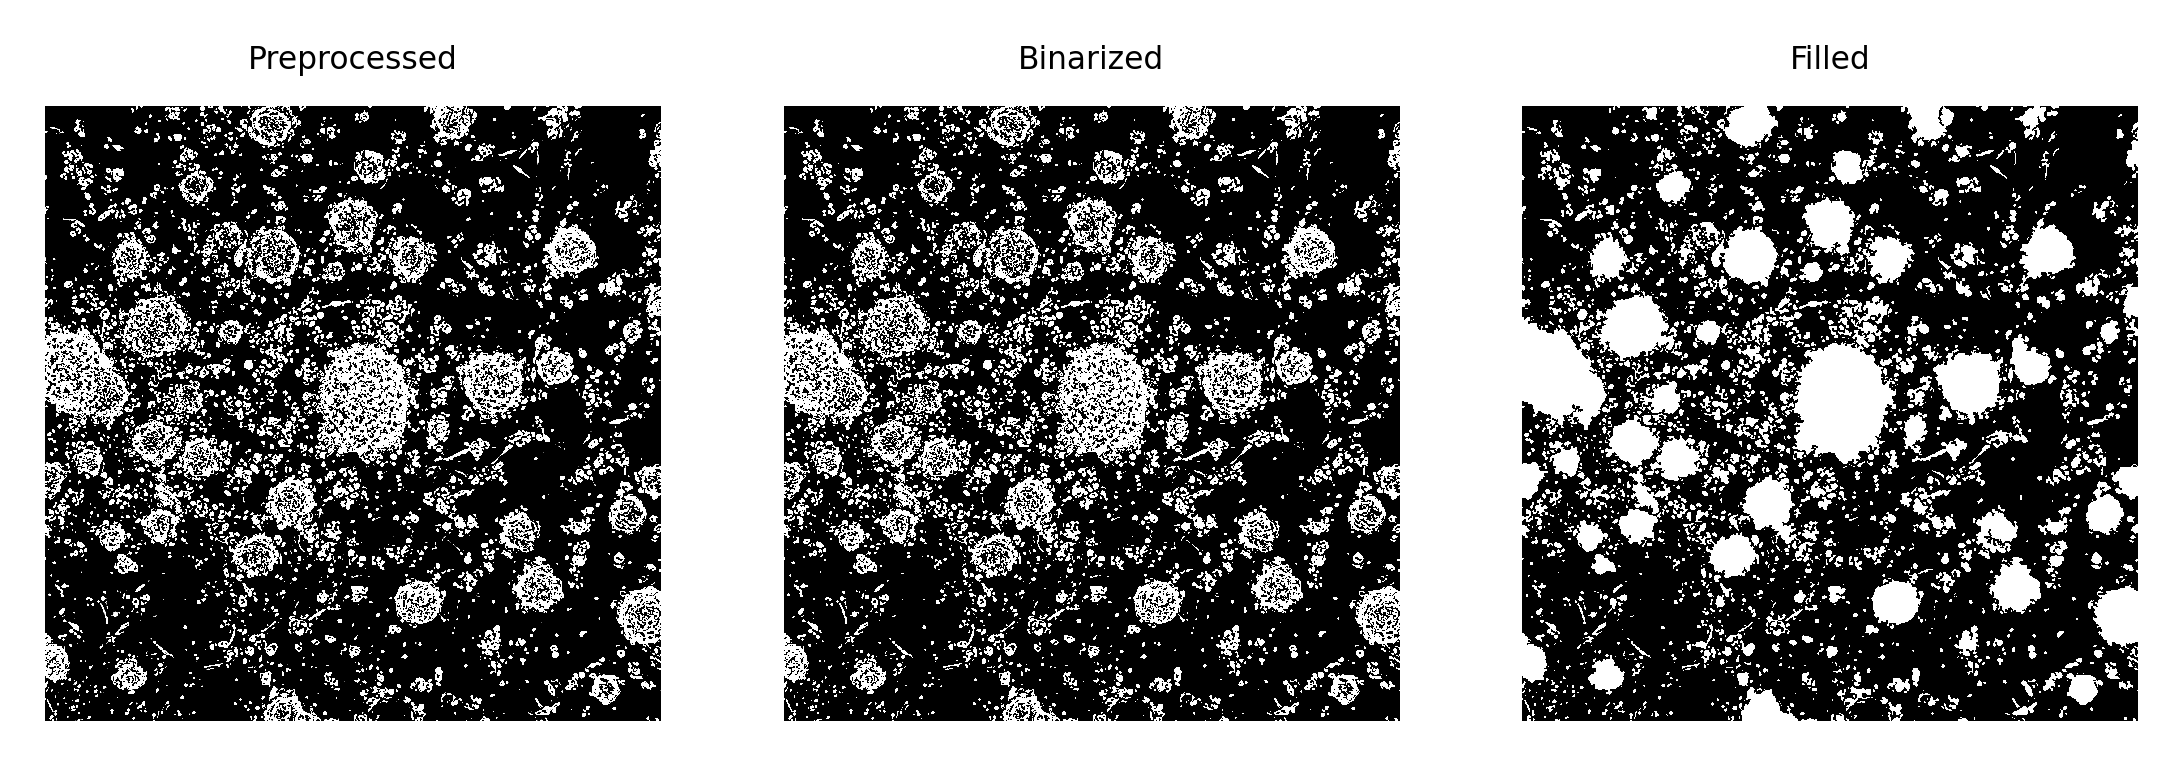

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-16 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


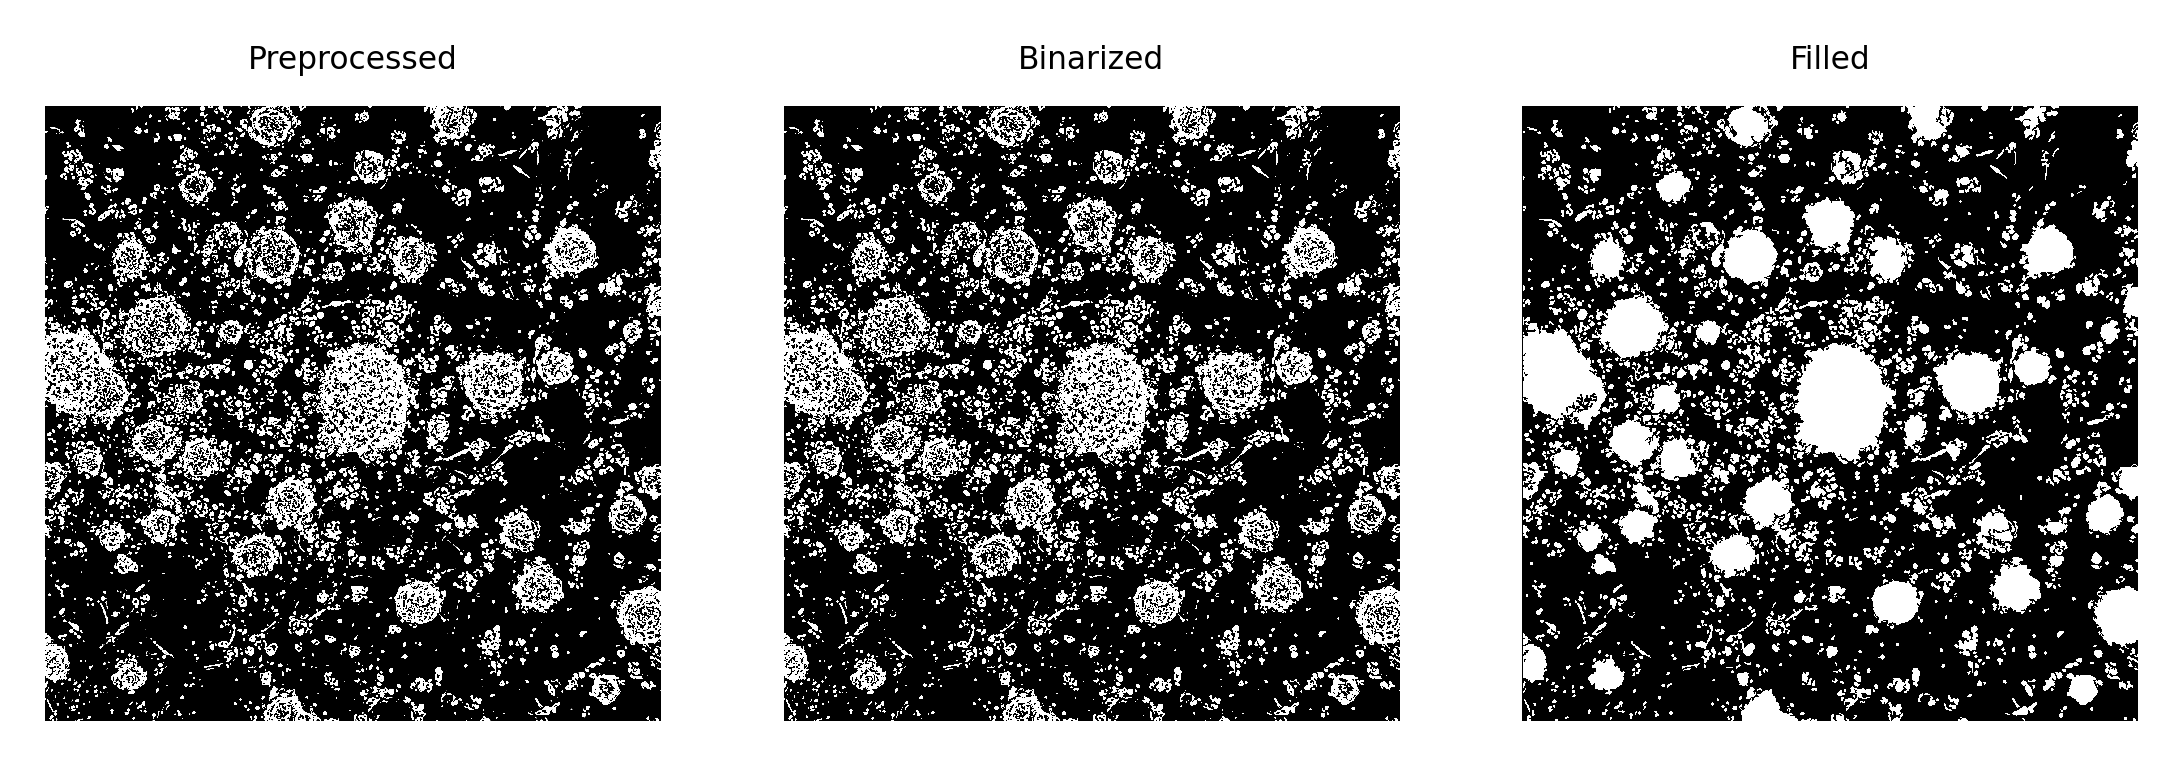

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-16 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


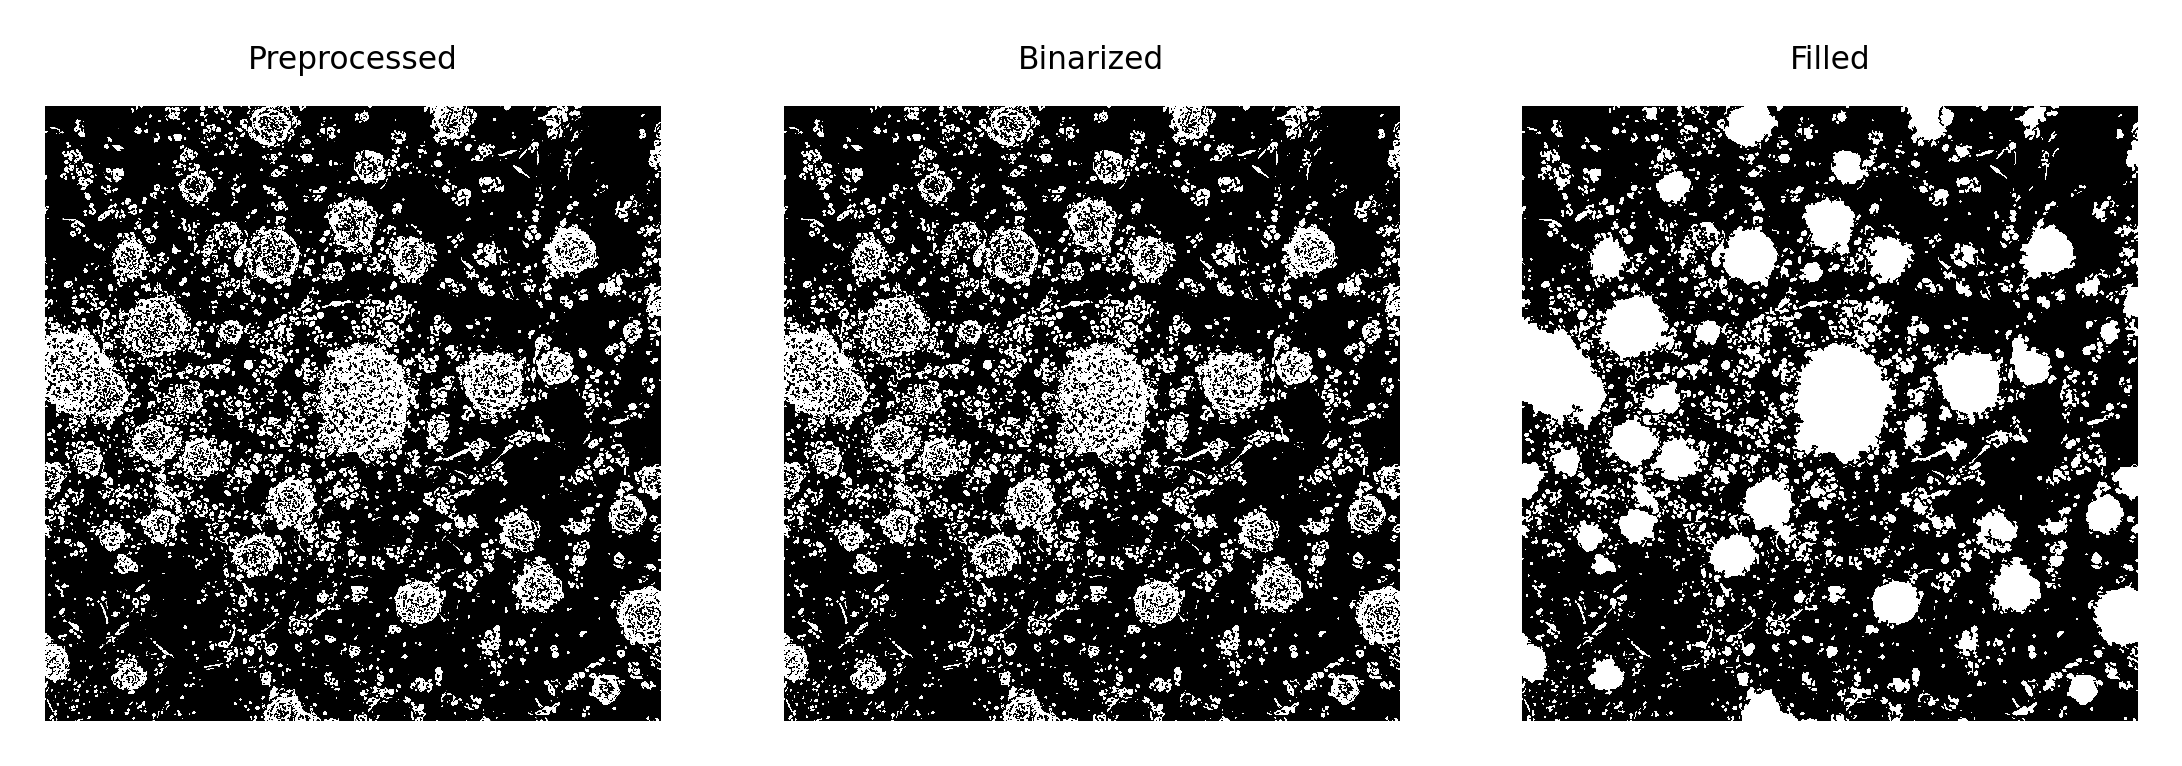

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-15 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


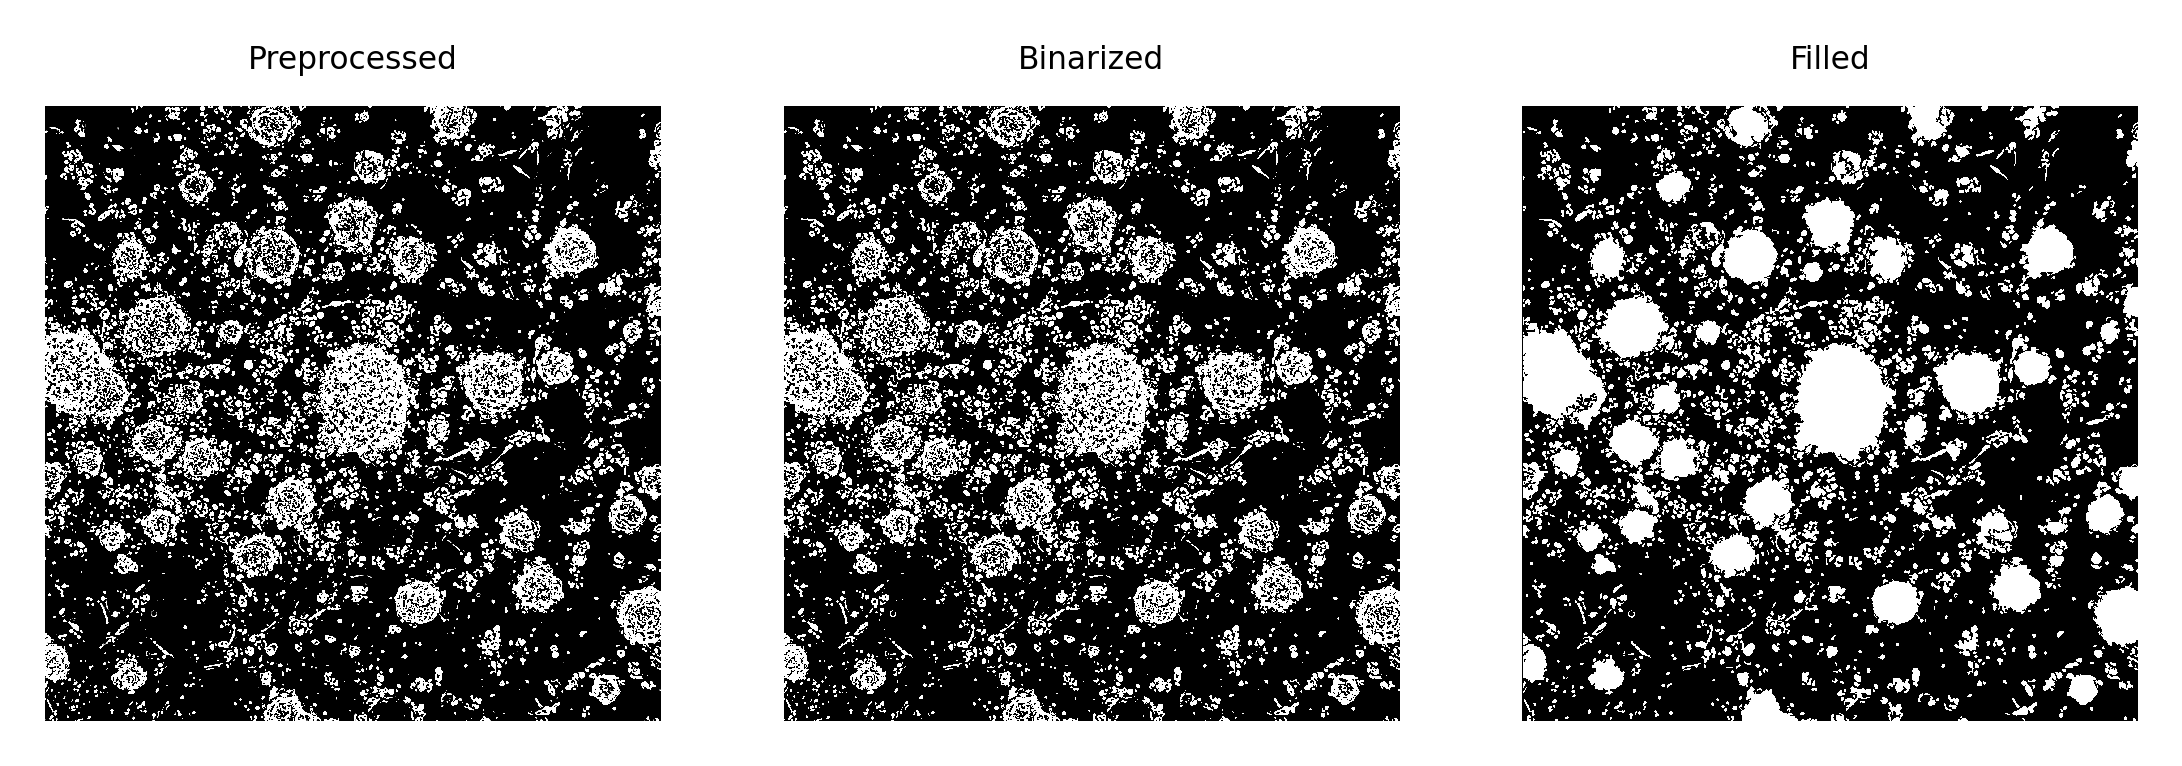

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-15 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


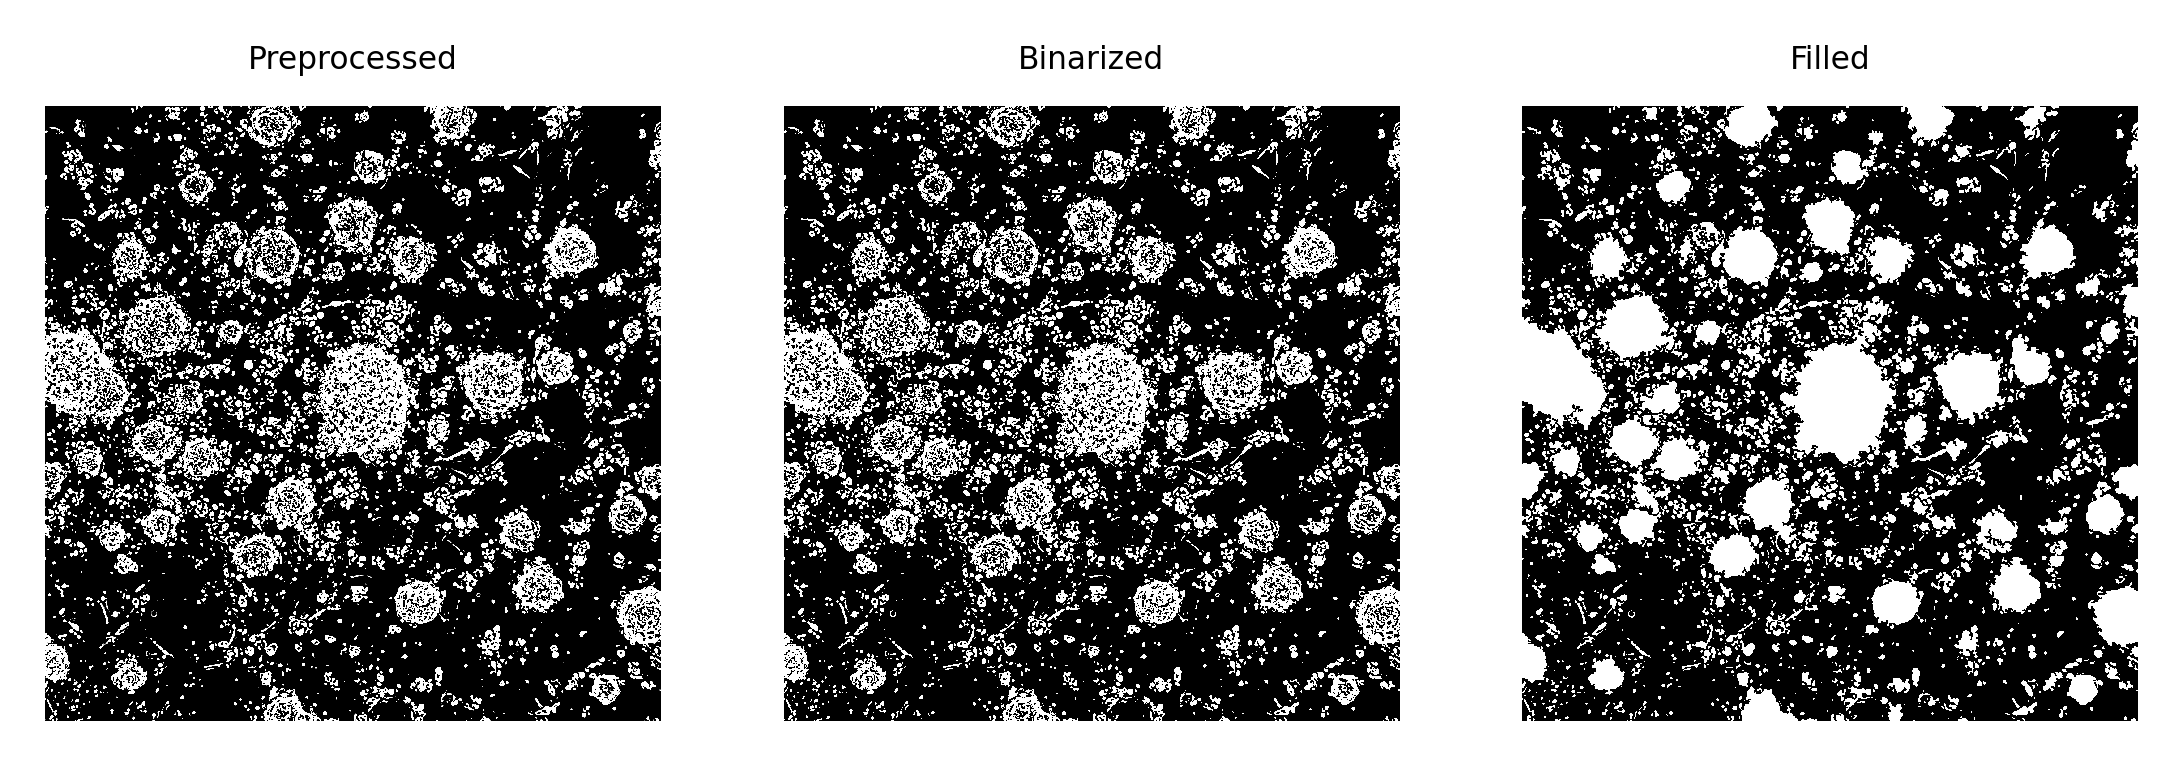

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-14 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


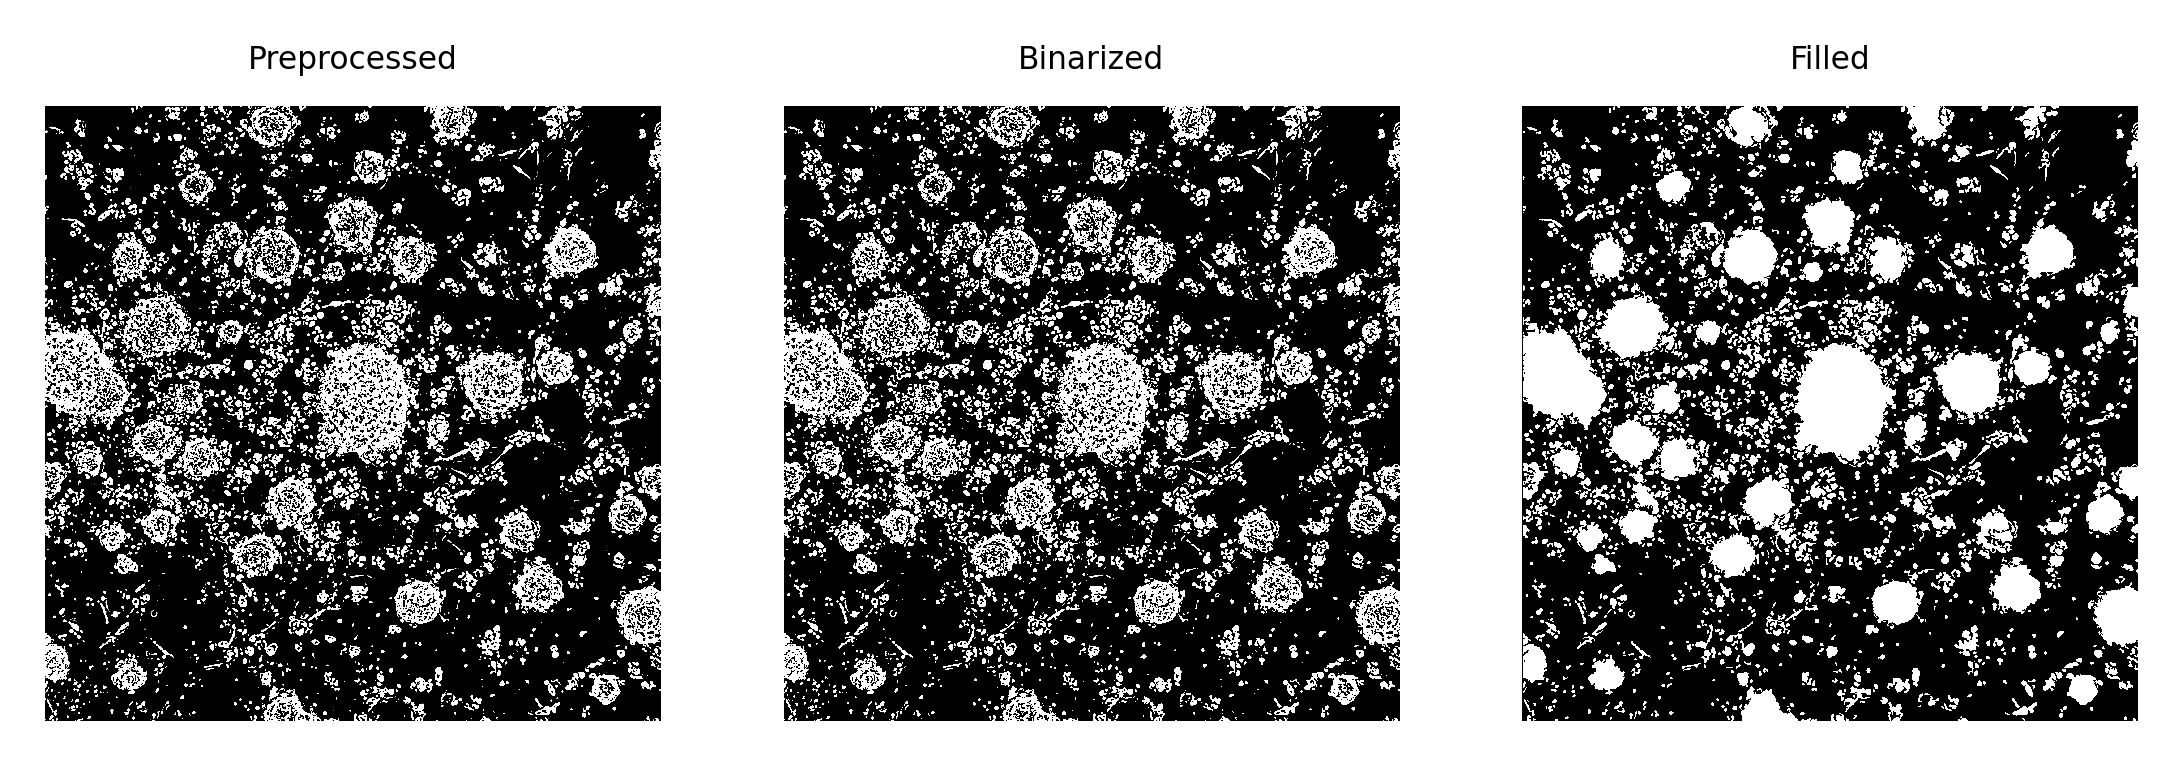

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-14 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


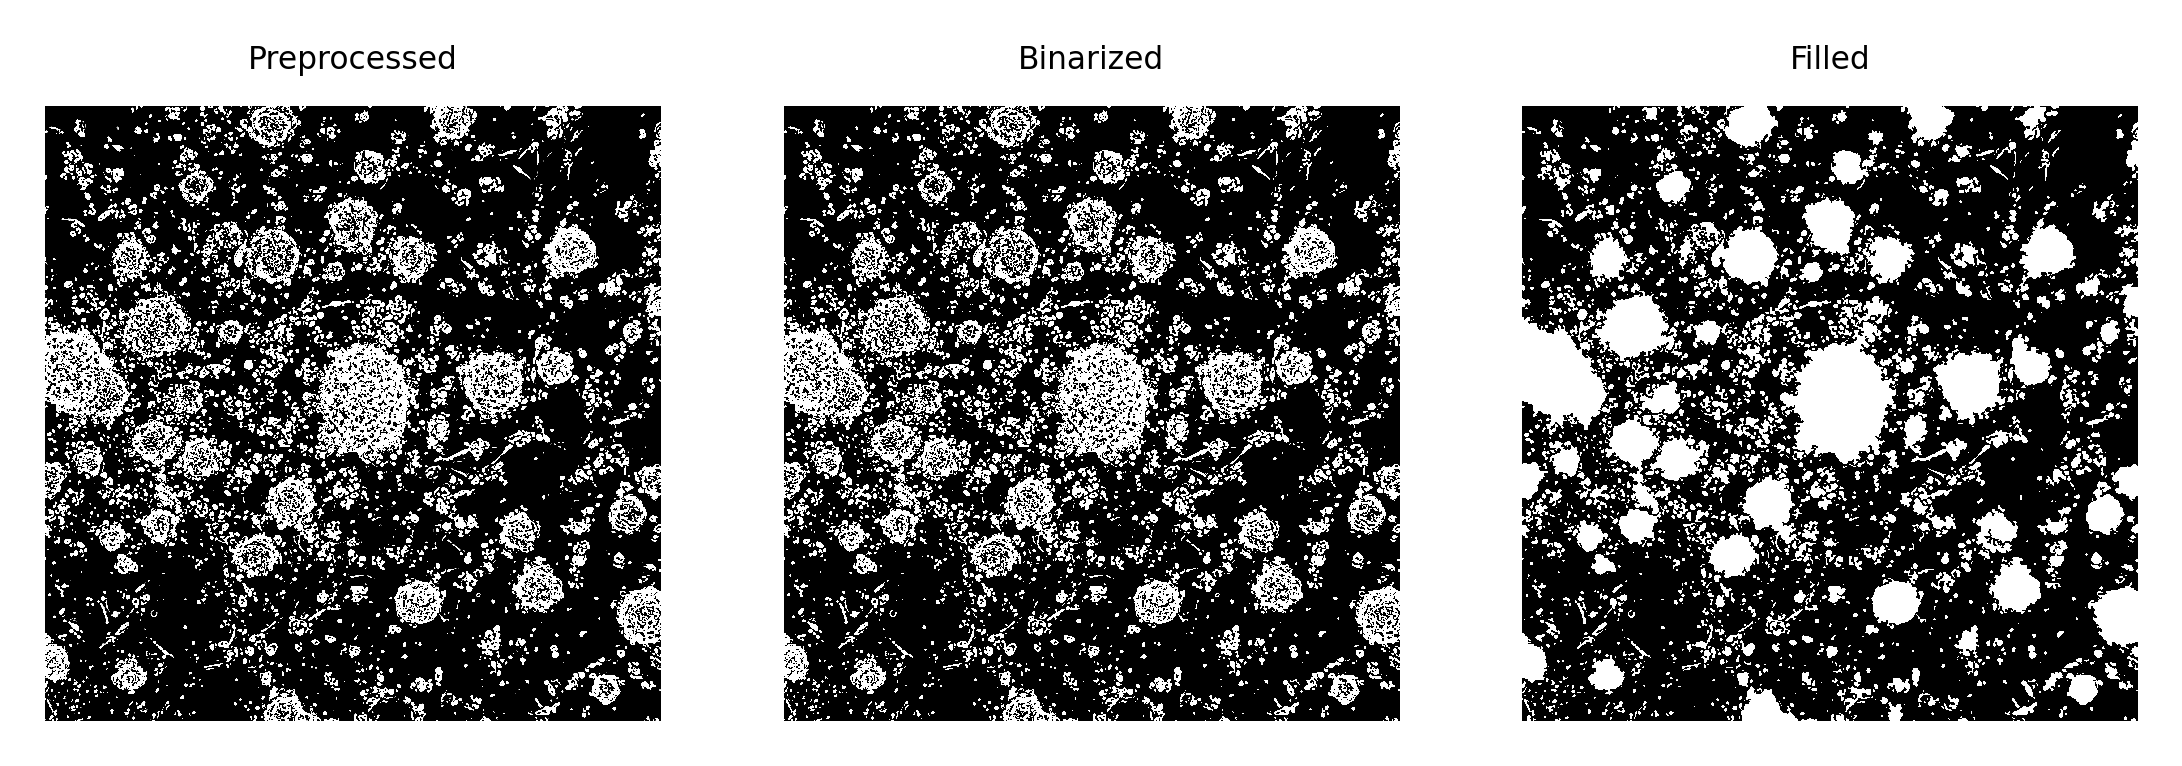

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-13 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


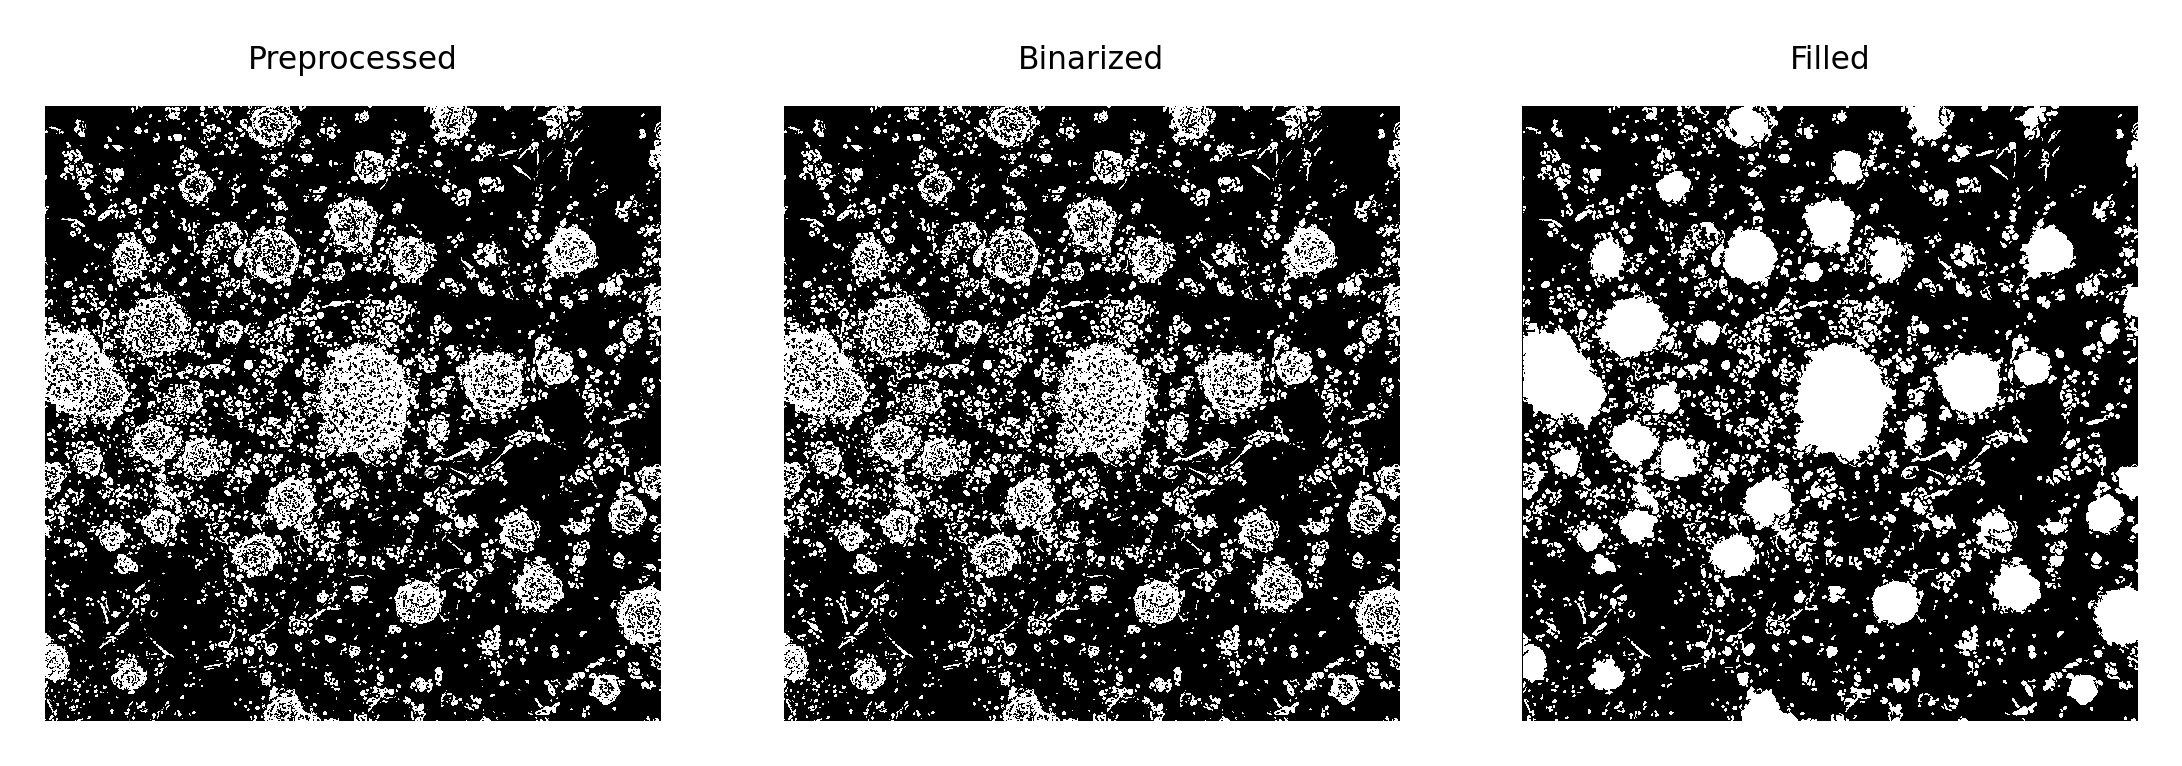

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-13 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


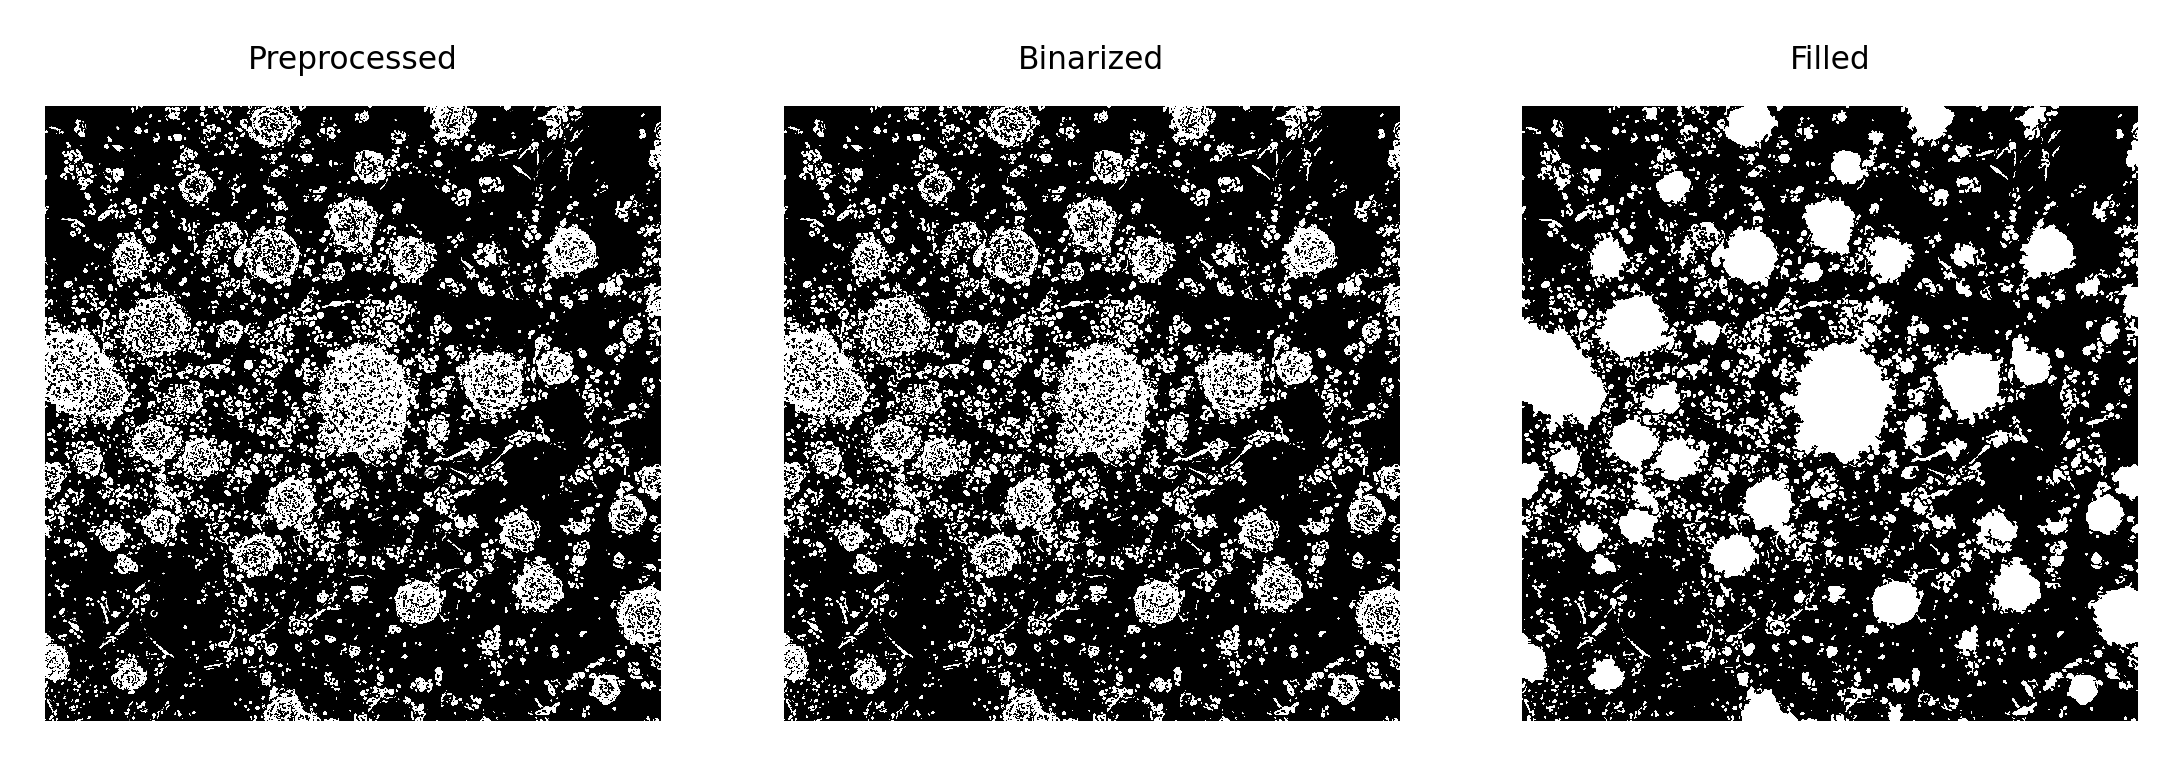

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-12 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


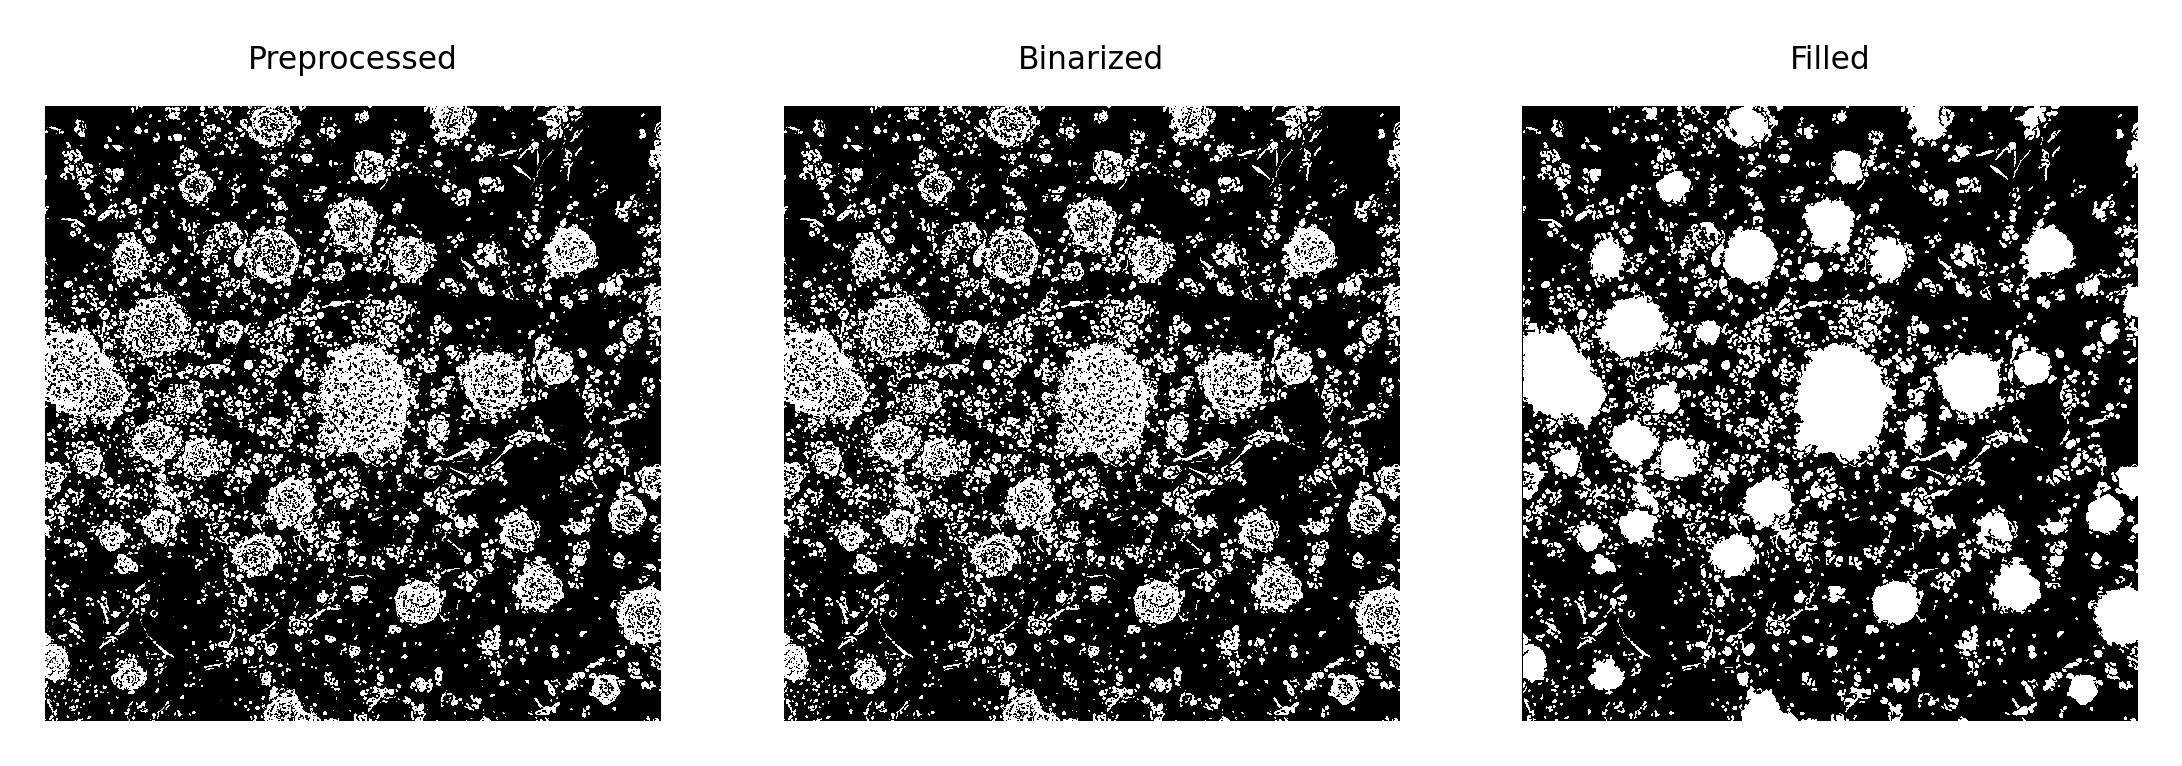

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-12 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


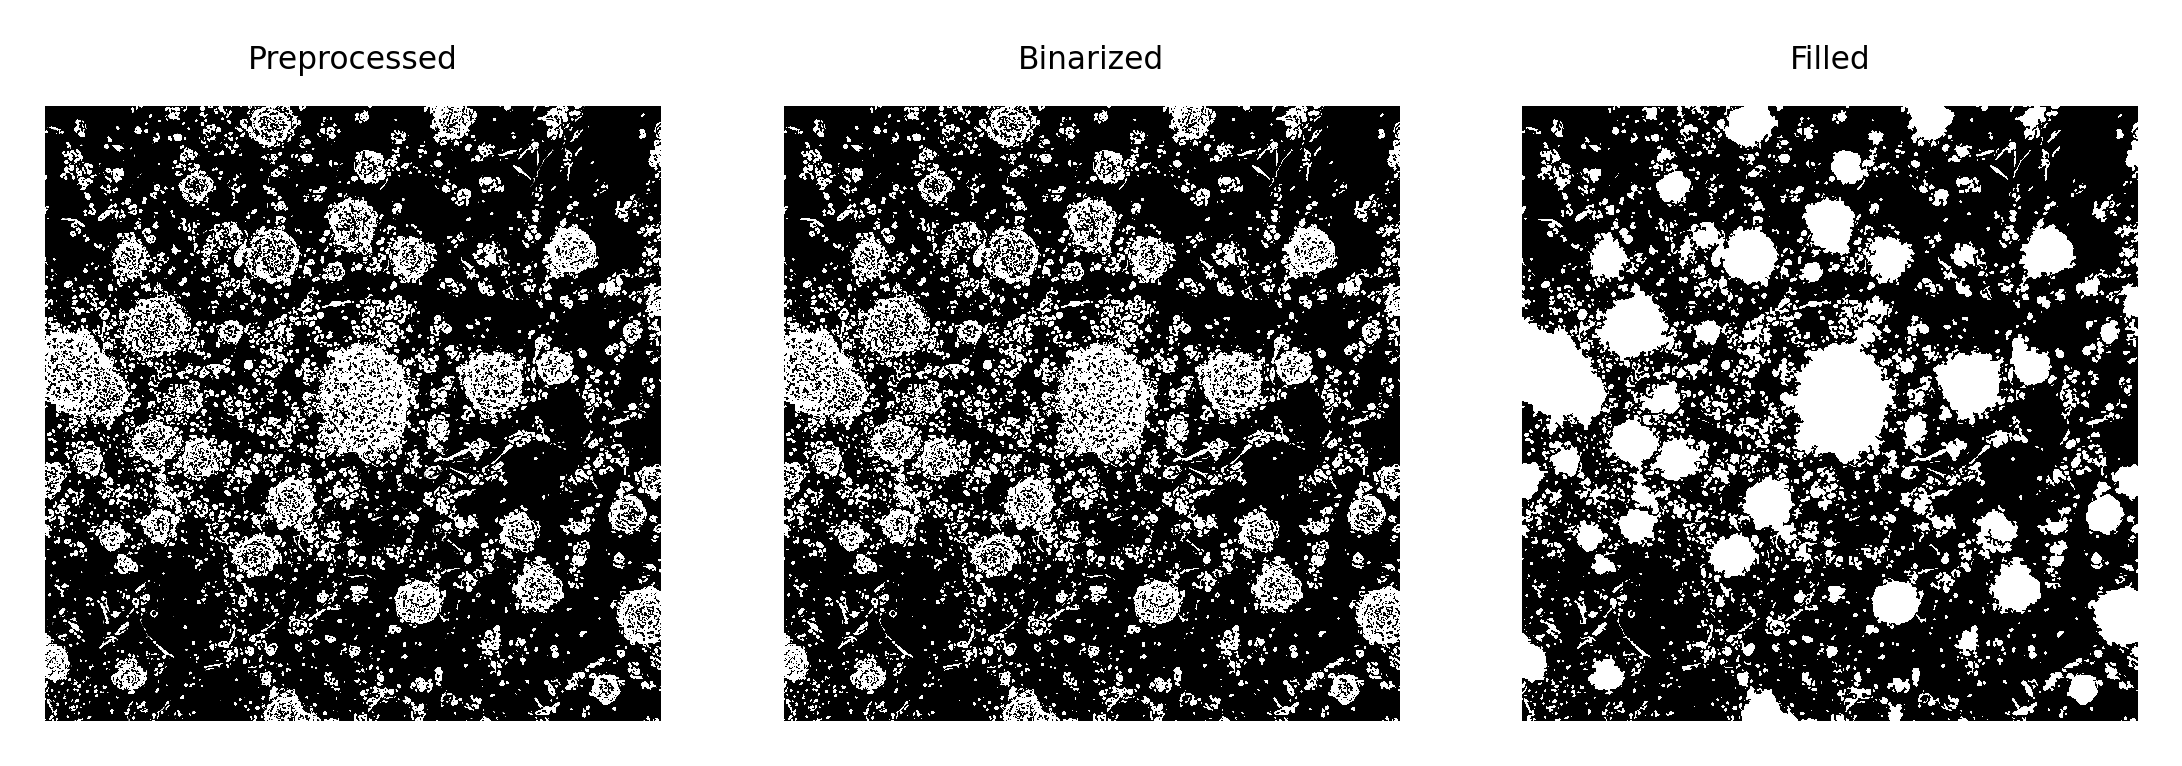

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-11 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


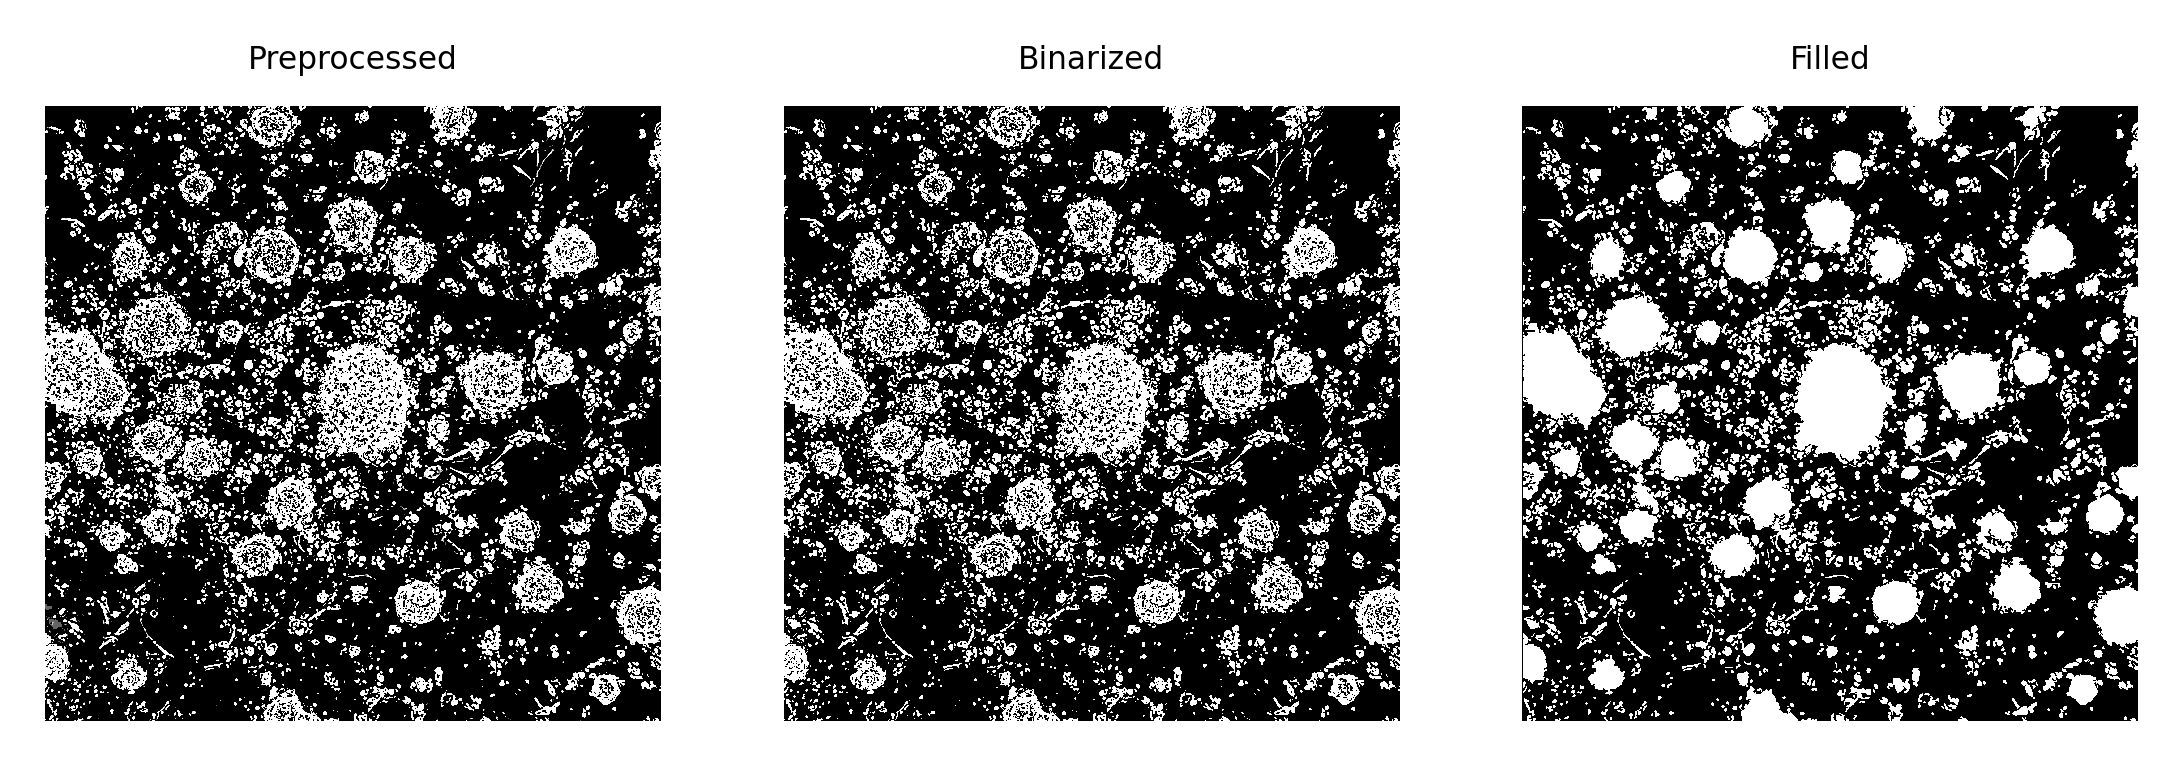

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-11 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


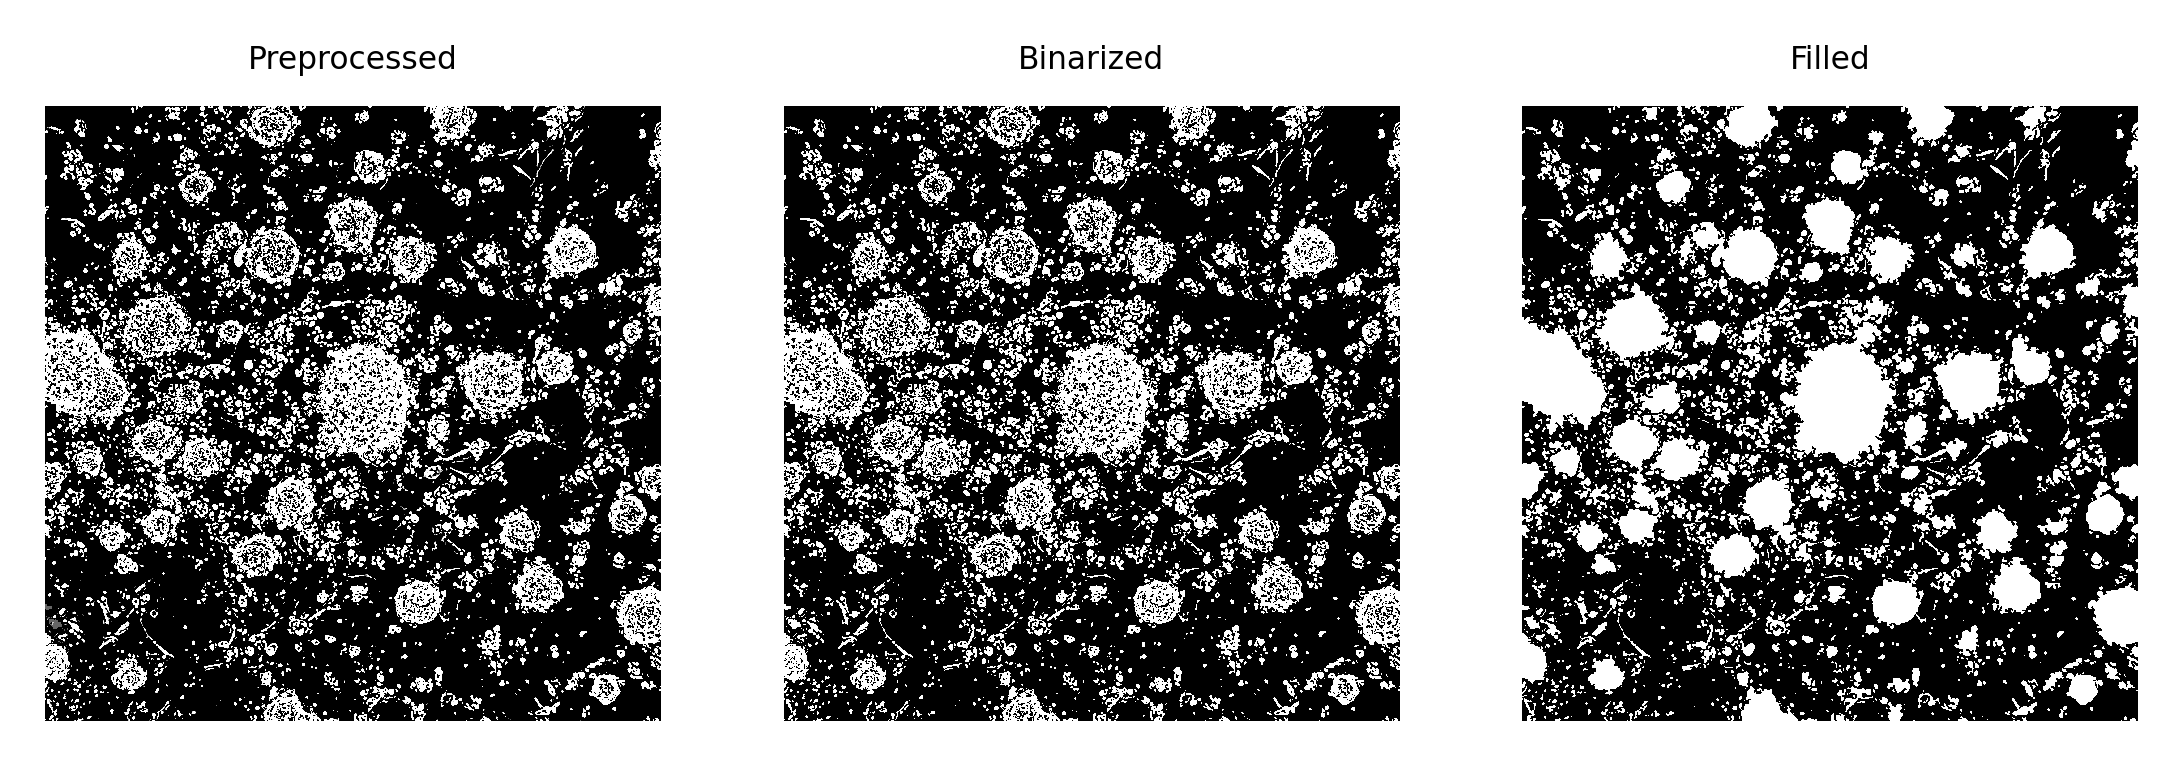

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-10 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


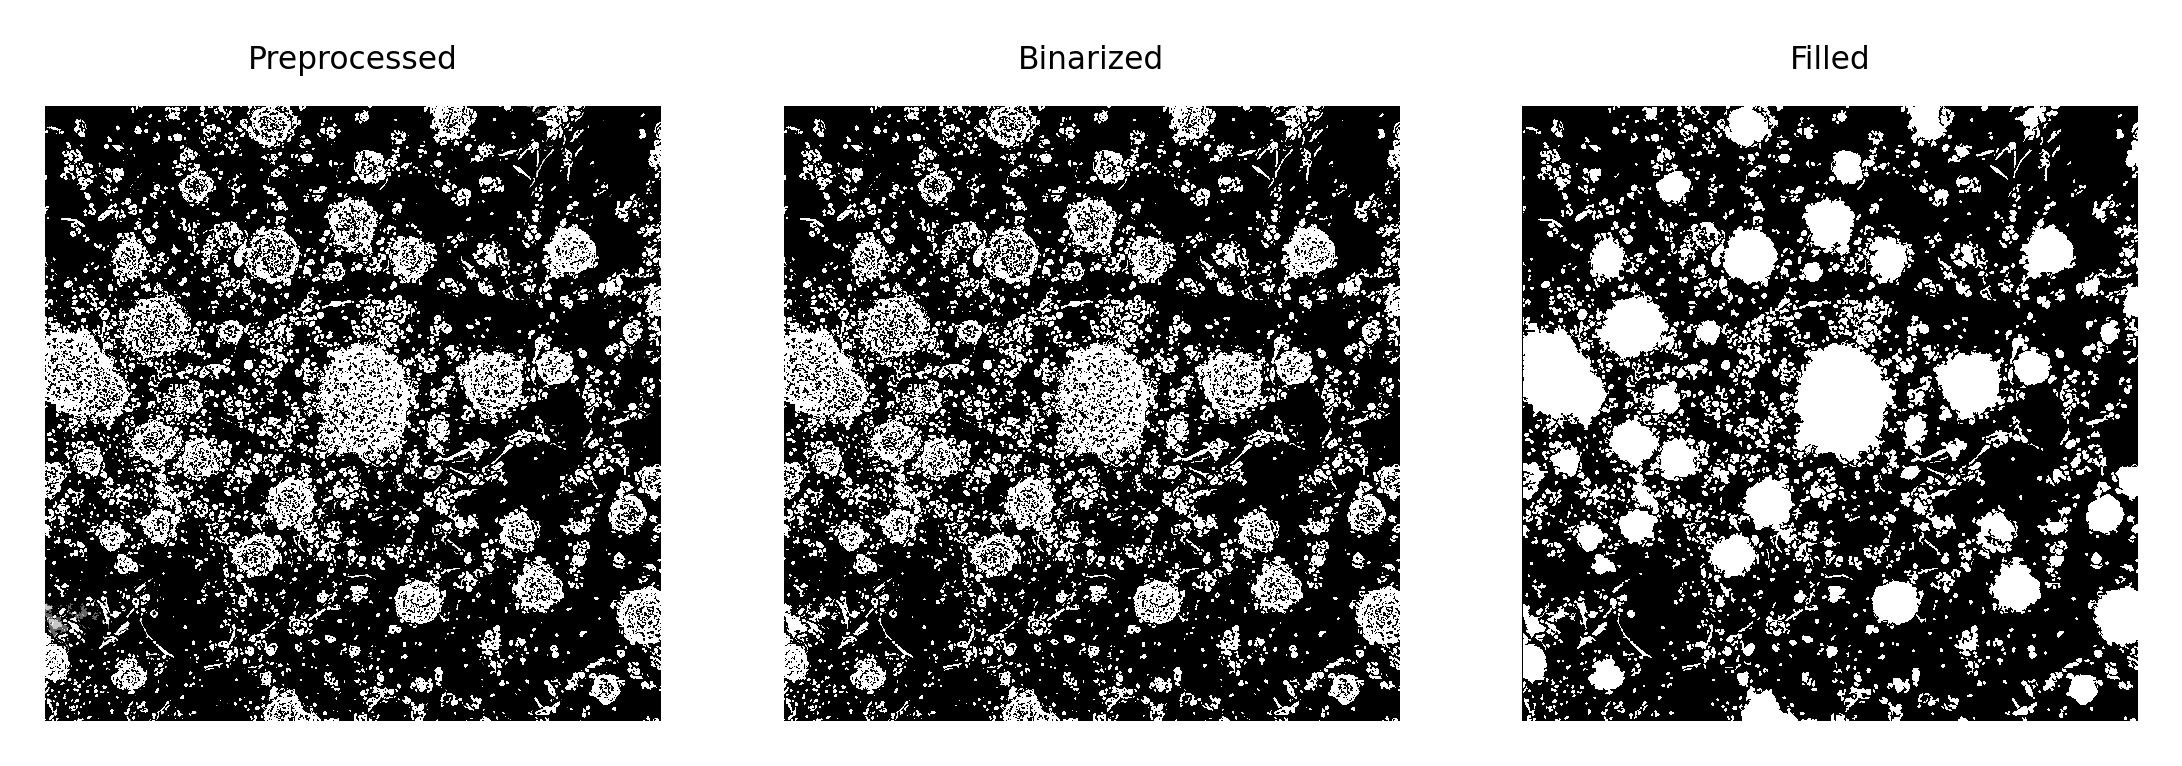

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-10 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


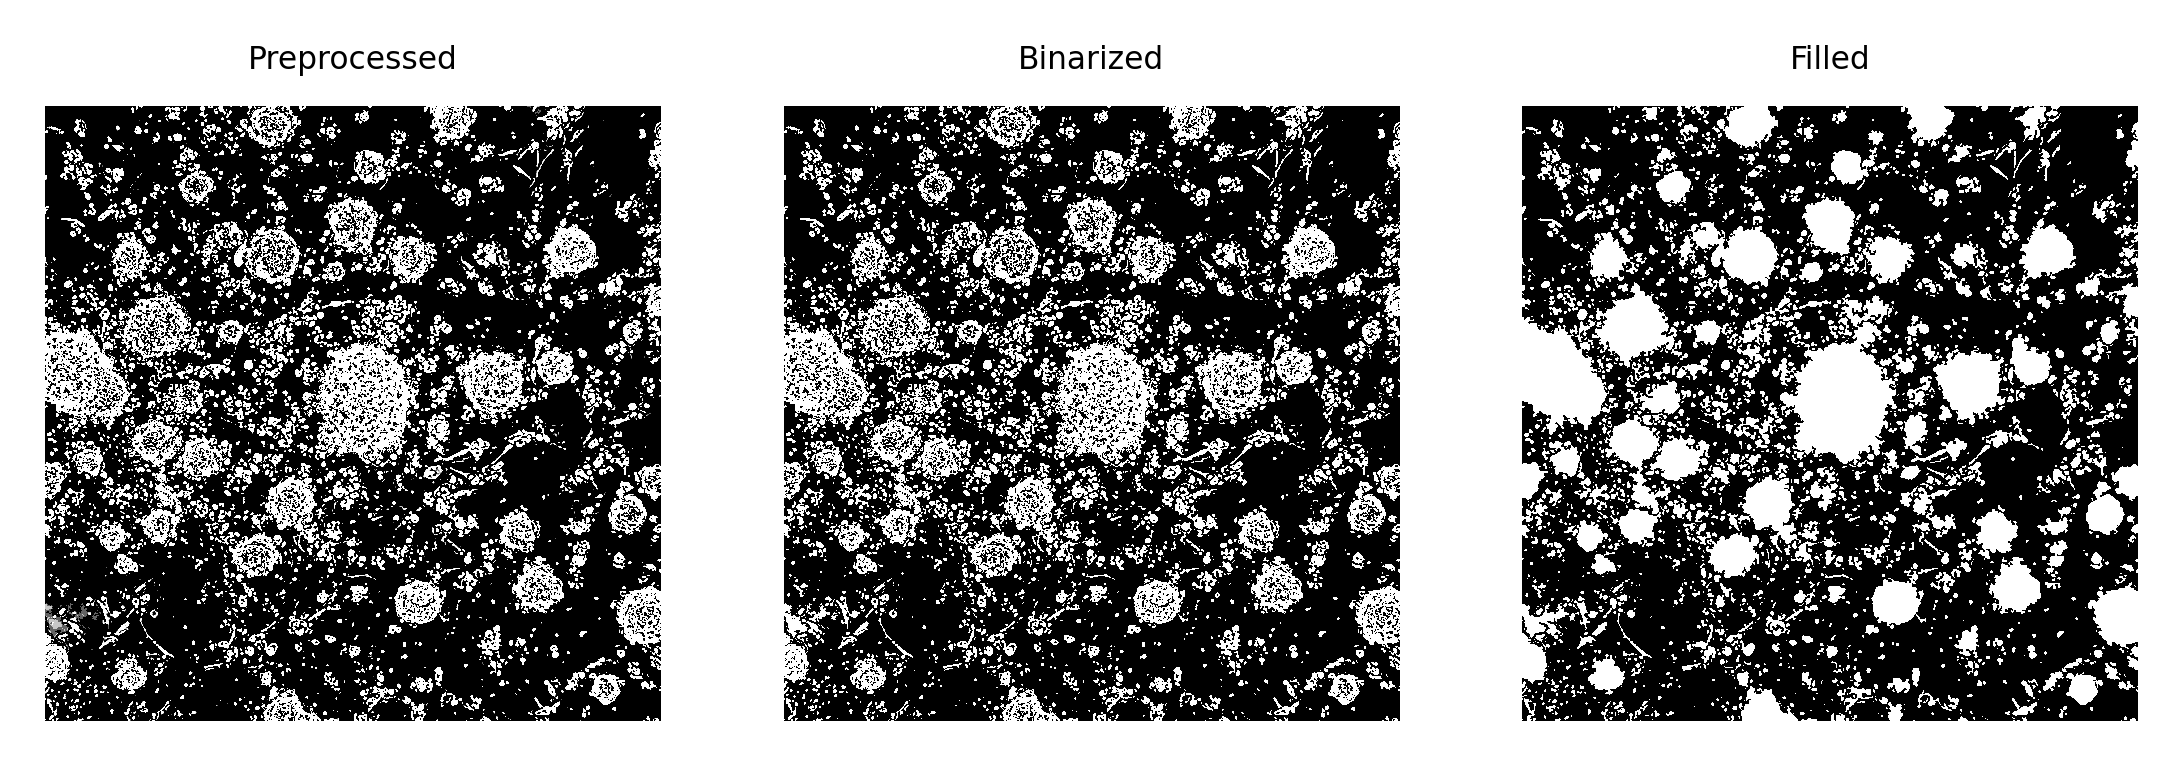

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-9 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 2.
Unmasking areas without edges using Canny[130, 180]:
Unmasking regions smaller than 50 pixels.


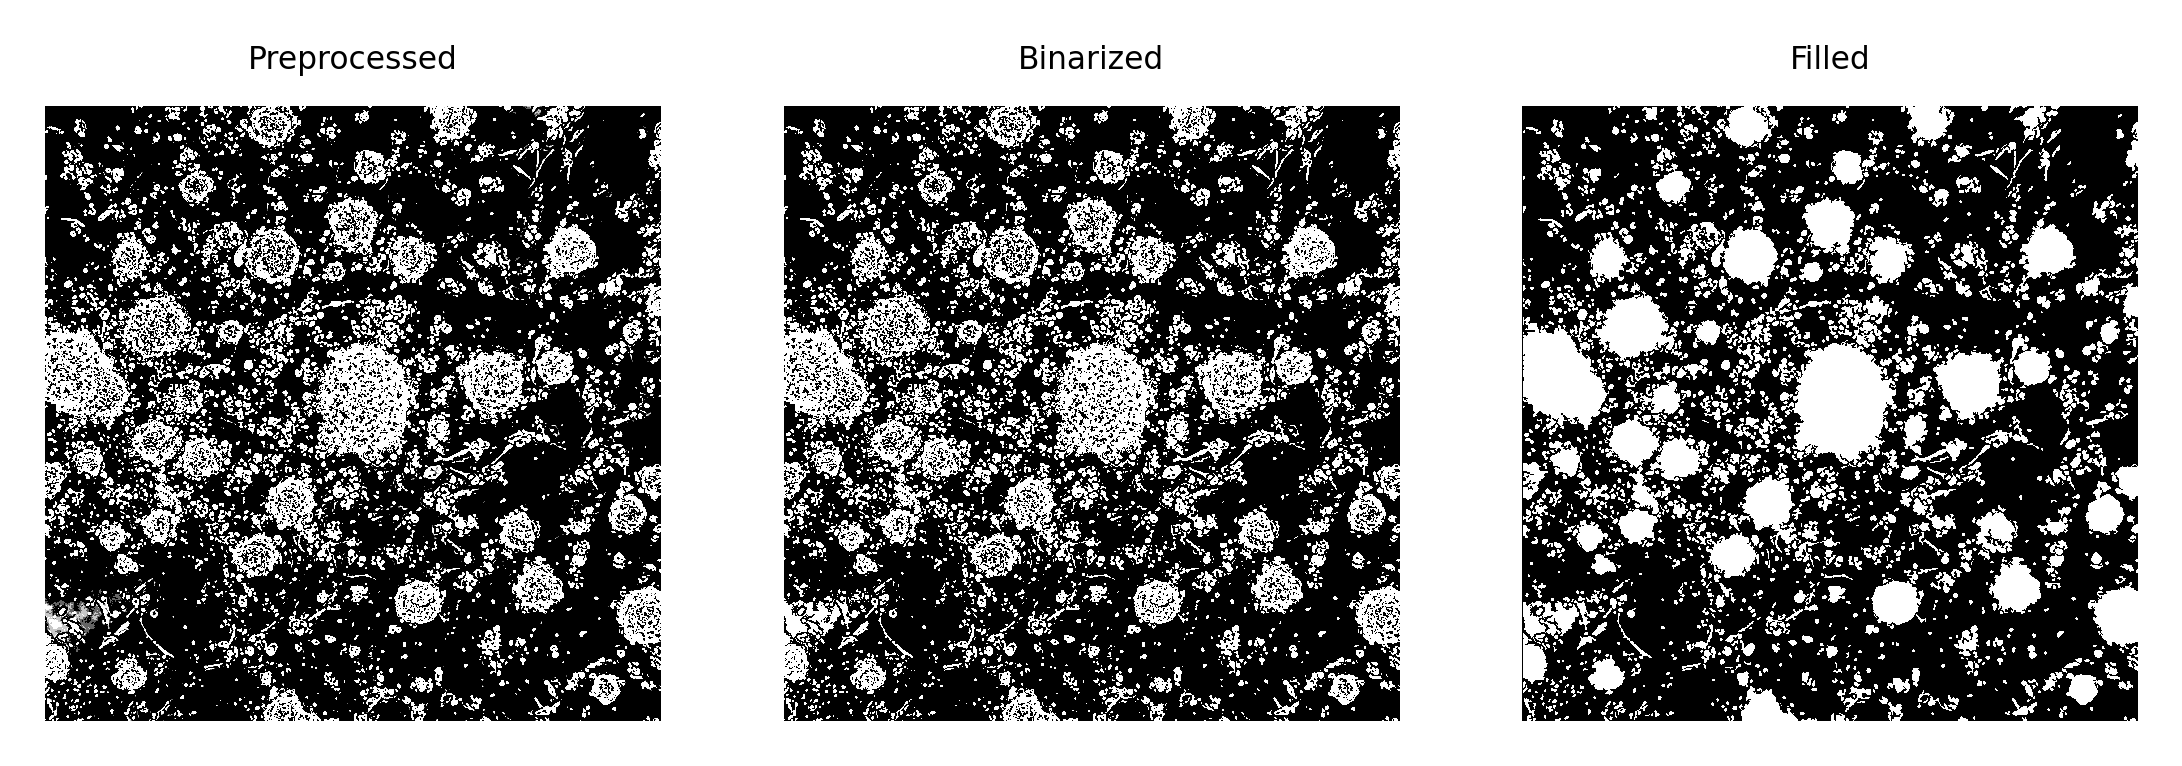

Using mode 'thresh_manual'.
Denoising with intensity 3.
Enhancing contrast by factor of 100.00, with offset=-9 and preserve_background=False.
Manually thresholding on values >=1.
Removing border of 1 pixels.
Closing with kernel size of 4.
Unmasking areas without edges using Canny[130, 180]:


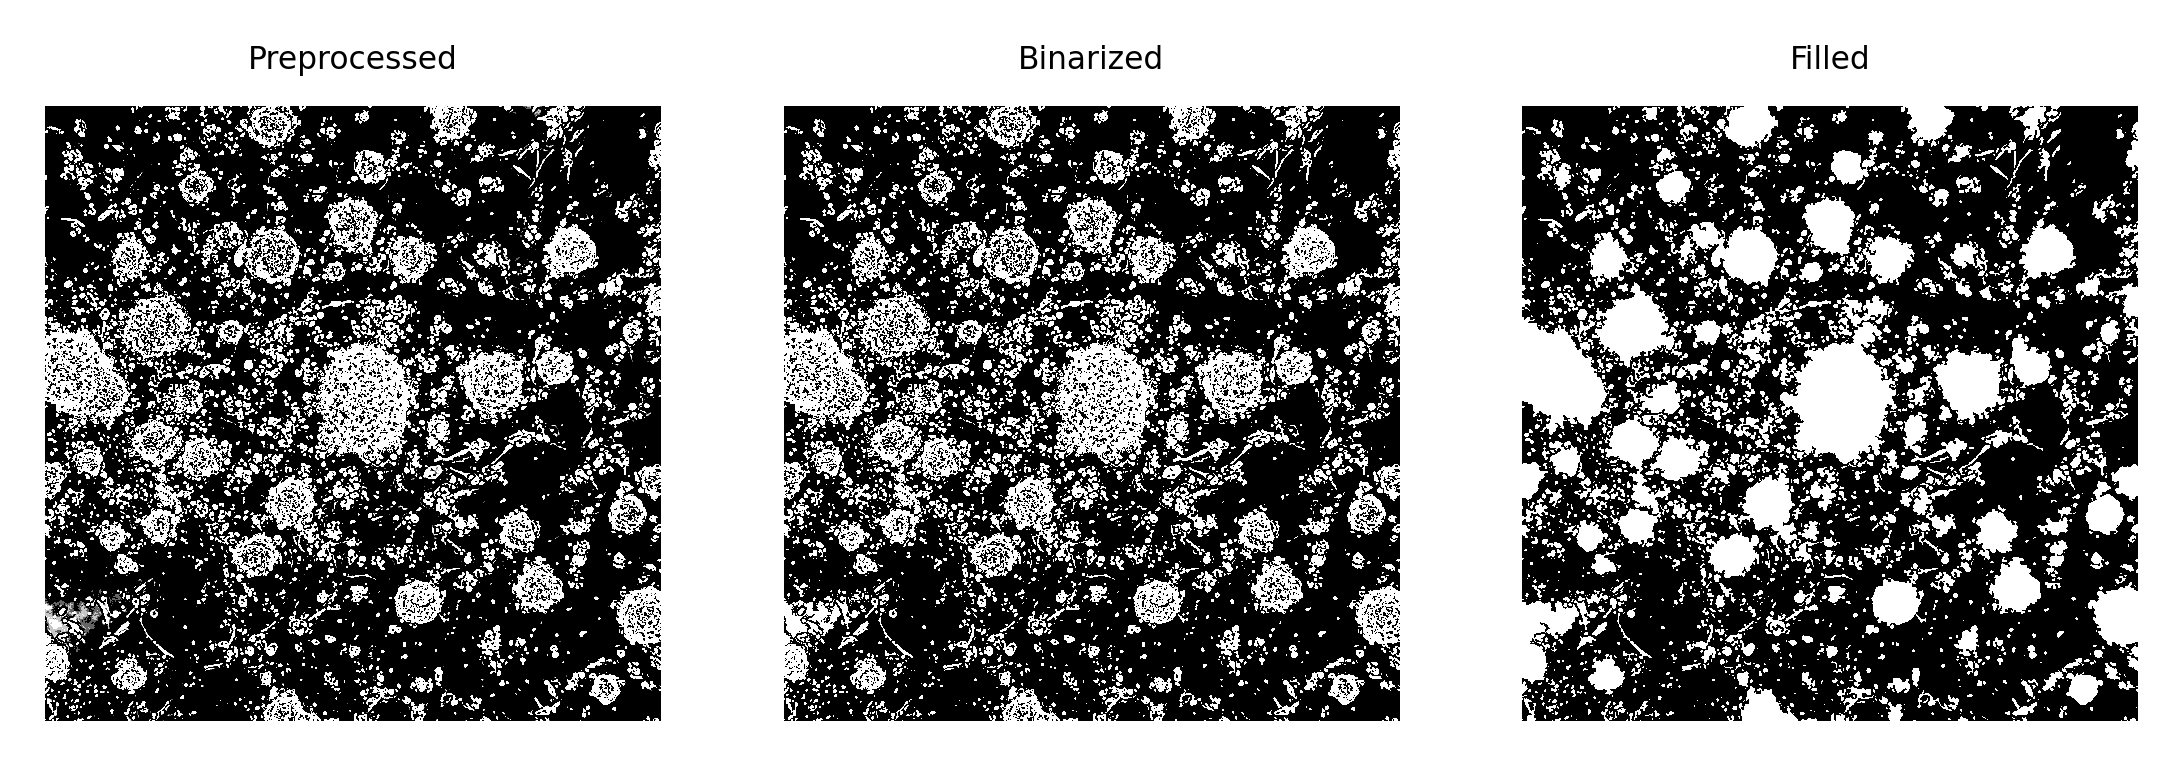

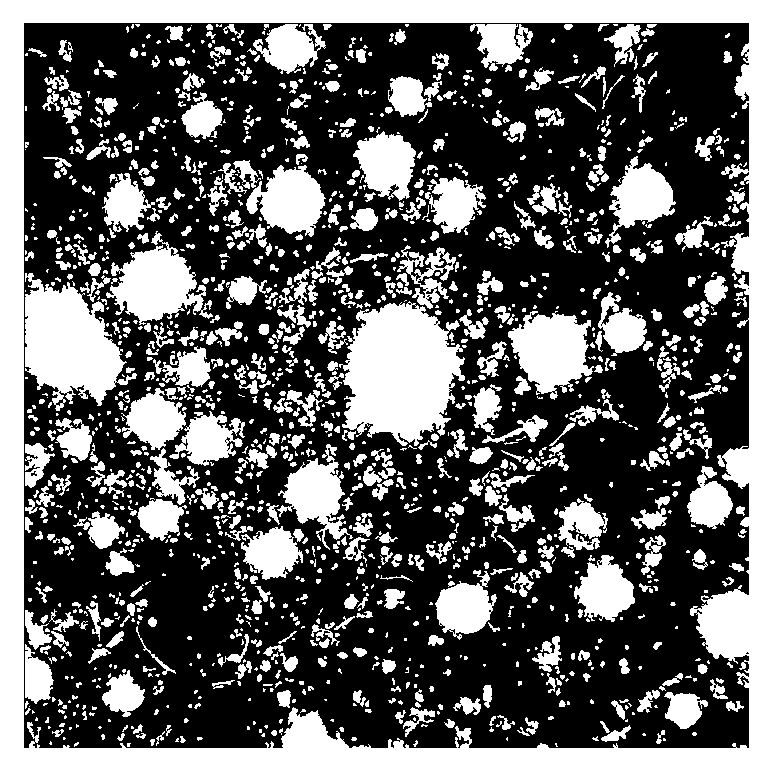

In [4]:
display_image(get_mask_image_with_refined_offset(image, verbosity=2))